In [38]:

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [39]:

import os
current_directory = os.getcwd()
while current_directory.endswith("Notebooks"):
    os.chdir("..")
    current_directory = os.getcwd()
    print("Current working directory: ", current_directory)

In [40]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from utils.filepaths.filepaths import (
    FILE_PATH_CASE_101,
    FILE_PATH_CASE_101_HFM_T,
    FILE_PATH_CASE_101_HFM_T_OBS,
    FILE_PATH_CASE_101_HFM_Z,
    FILE_PATH_DRILLING_REPORT_LABELED_CASE_101,
)
from utils.constants.constants import conversion_factor_for_densities
from utils.utils.utils import (
    get_active_drilling_data,
    reading_labeled_drill_report_data,
    extracting_labeled_data_from_dataframe,
    plot_sections,
    plot_with_warnings_down_hole_ecd,
    plot_with_warnings_pack_off_sensor_1_2,
    regression_for_asm_data_points

)
from utils.Classes.Classes.PackOffDetectionAlgorithm import PackOffDetectionAlgorithm
from scipy.stats import skew, kurtosis
sns.set_theme()

In [41]:
# Loading files
sensor_data_case_101 = pd.read_pickle(FILE_PATH_CASE_101)
# Extracting the dates to consider
tstamp_min = '2020-07-23 02:45:00+00:00'
tstamp_max = '2020-07-25 02:30:00+00:00'
sensor_data_case_101 = sensor_data_case_101.loc[tstamp_min:tstamp_max]
# First datapoint was removed during pickling of simdata. Have to so the same here
sensor_data_case_101 = sensor_data_case_101.iloc[1:] 
hfm_data_case_101_t = pd.read_pickle(FILE_PATH_CASE_101_HFM_T)
hfm_data_case_101_t_obs = pd.read_pickle(FILE_PATH_CASE_101_HFM_T_OBS)
hfm_data_case_101_z = pd.read_pickle(FILE_PATH_CASE_101_HFM_Z)
hfm_data_case_101_t.index = sensor_data_case_101.index
hfm_data_case_101_t_obs.index = sensor_data_case_101.index


In [42]:
# Threshold based on 100 us gpm value to ensure active drilling
df_sensor, df_simulated = get_active_drilling_data(df = sensor_data_case_101, sim_df=hfm_data_case_101_t_obs, include_rop_zeros=True)
df_simulated = df_simulated.loc[df_sensor.index]
df_sensor["DH_PRESS_ECD"] = df_sensor["DH_PRESS_ECD"] / conversion_factor_for_densities

C:\Users\thomaswi\AppData\Local\Temp\ipykernel_6848\2789682944.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sensor["DH_PRESS_ECD"] = df_sensor["DH_PRESS_ECD"] / conversion_factor_for_densities


In [43]:
# plot_with_warnings_down_hole_ecd(df=df_sensor, warnings = detection.warnings_simple_torque_and_ecd_alarm_time_interval_both)

In [52]:

warnings_linreg = []
time_stamps_linreg = []
number_of_points = 20
for index in range(number_of_points,len(df_sensor)):
    reg_1, reg_2, best_fit_1, best_fit_2,x_axis,variables_1,variables_2 = regression_for_asm_data_points(df_sensor["ASMECD1-T"].values,df_sensor["ASMECD2-T"].values,number_of_points_to_evaluate=number_of_points,idx = index, degree=1)
    if reg_1[0] > .0002 and reg_2[0] <= 0:
        warnings_linreg.append([df_sensor.index[index],index])

In [53]:
print(warnings_linreg)
print(len(warnings_linreg))

[['2020-07-23 13:46:10+00:00', 921], ['2020-07-23 13:46:20+00:00', 922], ['2020-07-23 13:46:30+00:00', 923], ['2020-07-23 13:46:40+00:00', 924], ['2020-07-23 13:46:50+00:00', 925], ['2020-07-23 13:47:00+00:00', 926], ['2020-07-23 13:47:10+00:00', 927], ['2020-07-23 13:47:20+00:00', 928], ['2020-07-23 18:35:40+00:00', 2658], ['2020-07-23 18:46:10+00:00', 2721], ['2020-07-23 18:46:20+00:00', 2722], ['2020-07-23 19:19:40+00:00', 2922], ['2020-07-23 19:19:50+00:00', 2923], ['2020-07-23 19:20:00+00:00', 2924], ['2020-07-23 19:48:00+00:00', 3092], ['2020-07-23 19:48:10+00:00', 3093], ['2020-07-23 19:48:20+00:00', 3094], ['2020-07-23 19:48:30+00:00', 3095], ['2020-07-23 19:48:40+00:00', 3096], ['2020-07-23 19:48:50+00:00', 3097], ['2020-07-23 19:49:00+00:00', 3098], ['2020-07-23 19:49:10+00:00', 3099], ['2020-07-23 19:49:20+00:00', 3100], ['2020-07-23 19:49:30+00:00', 3101], ['2020-07-23 19:49:40+00:00', 3102], ['2020-07-23 19:49:50+00:00', 3103], ['2020-07-23 22:30:00+00:00', 4064], ['2020-0

In [46]:
plot_with_warnings_pack_off_sensor_1_2(df_input=df_sensor,df_sim = df_simulated, warnings = warnings_linreg,chunk_size=500)

c:\Users\thomaswi\OneDrive - SINTEF\Drilling and well\Code\CodeForMaster\utils\utils\utils.py:154: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(8,figsize = (20,20))


In [47]:

plt.rcParams['text.usetex'] = True
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)
sns.set_theme()
transients = []
ecd_1_segments = []
ecd_2_segments = []
ecd_1_segments_sim = []
ecd_2_segments_sim = []
window_size = 20
indices = [905, 3080, 5447,8963]

for index in indices:
    transients.append([df_sensor.index[index], index])
    ecd_1_segments.append(df_sensor["ASMECD1-T"].iloc[index - window_size:index + window_size].values)
    ecd_2_segments.append(df_sensor["ASMECD2-T"].iloc[index - window_size:index + window_size].values)
    ecd_1_segments_sim.append(df_simulated["ecdAtPos2"].iloc[index - window_size:index + window_size].values)
    ecd_2_segments_sim.append(df_simulated["ecdAtPos3"].iloc[index - window_size:index + window_size].values)

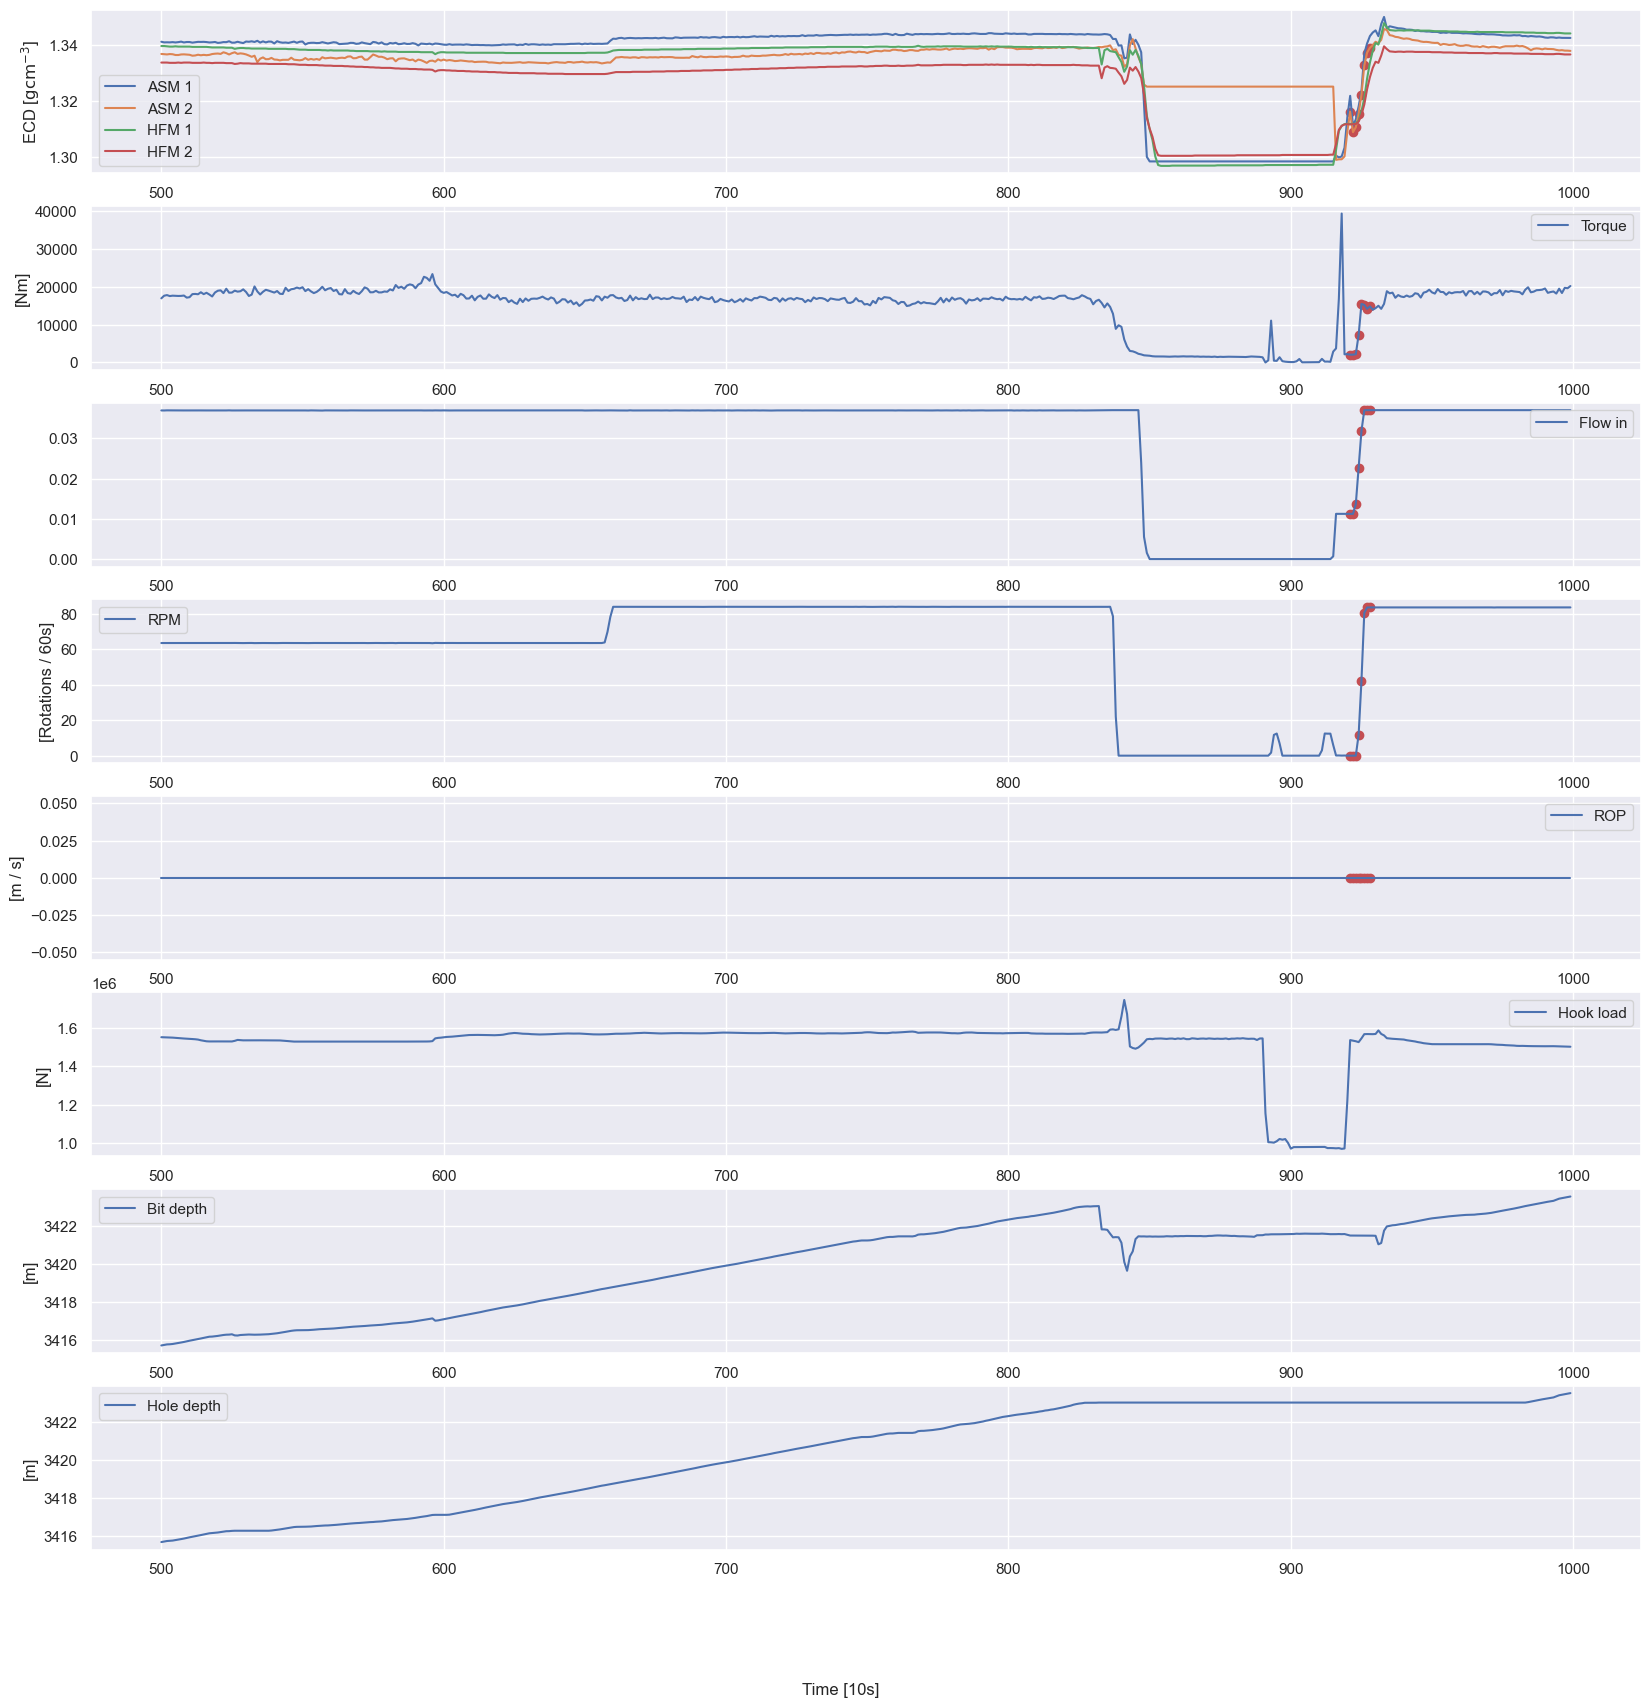

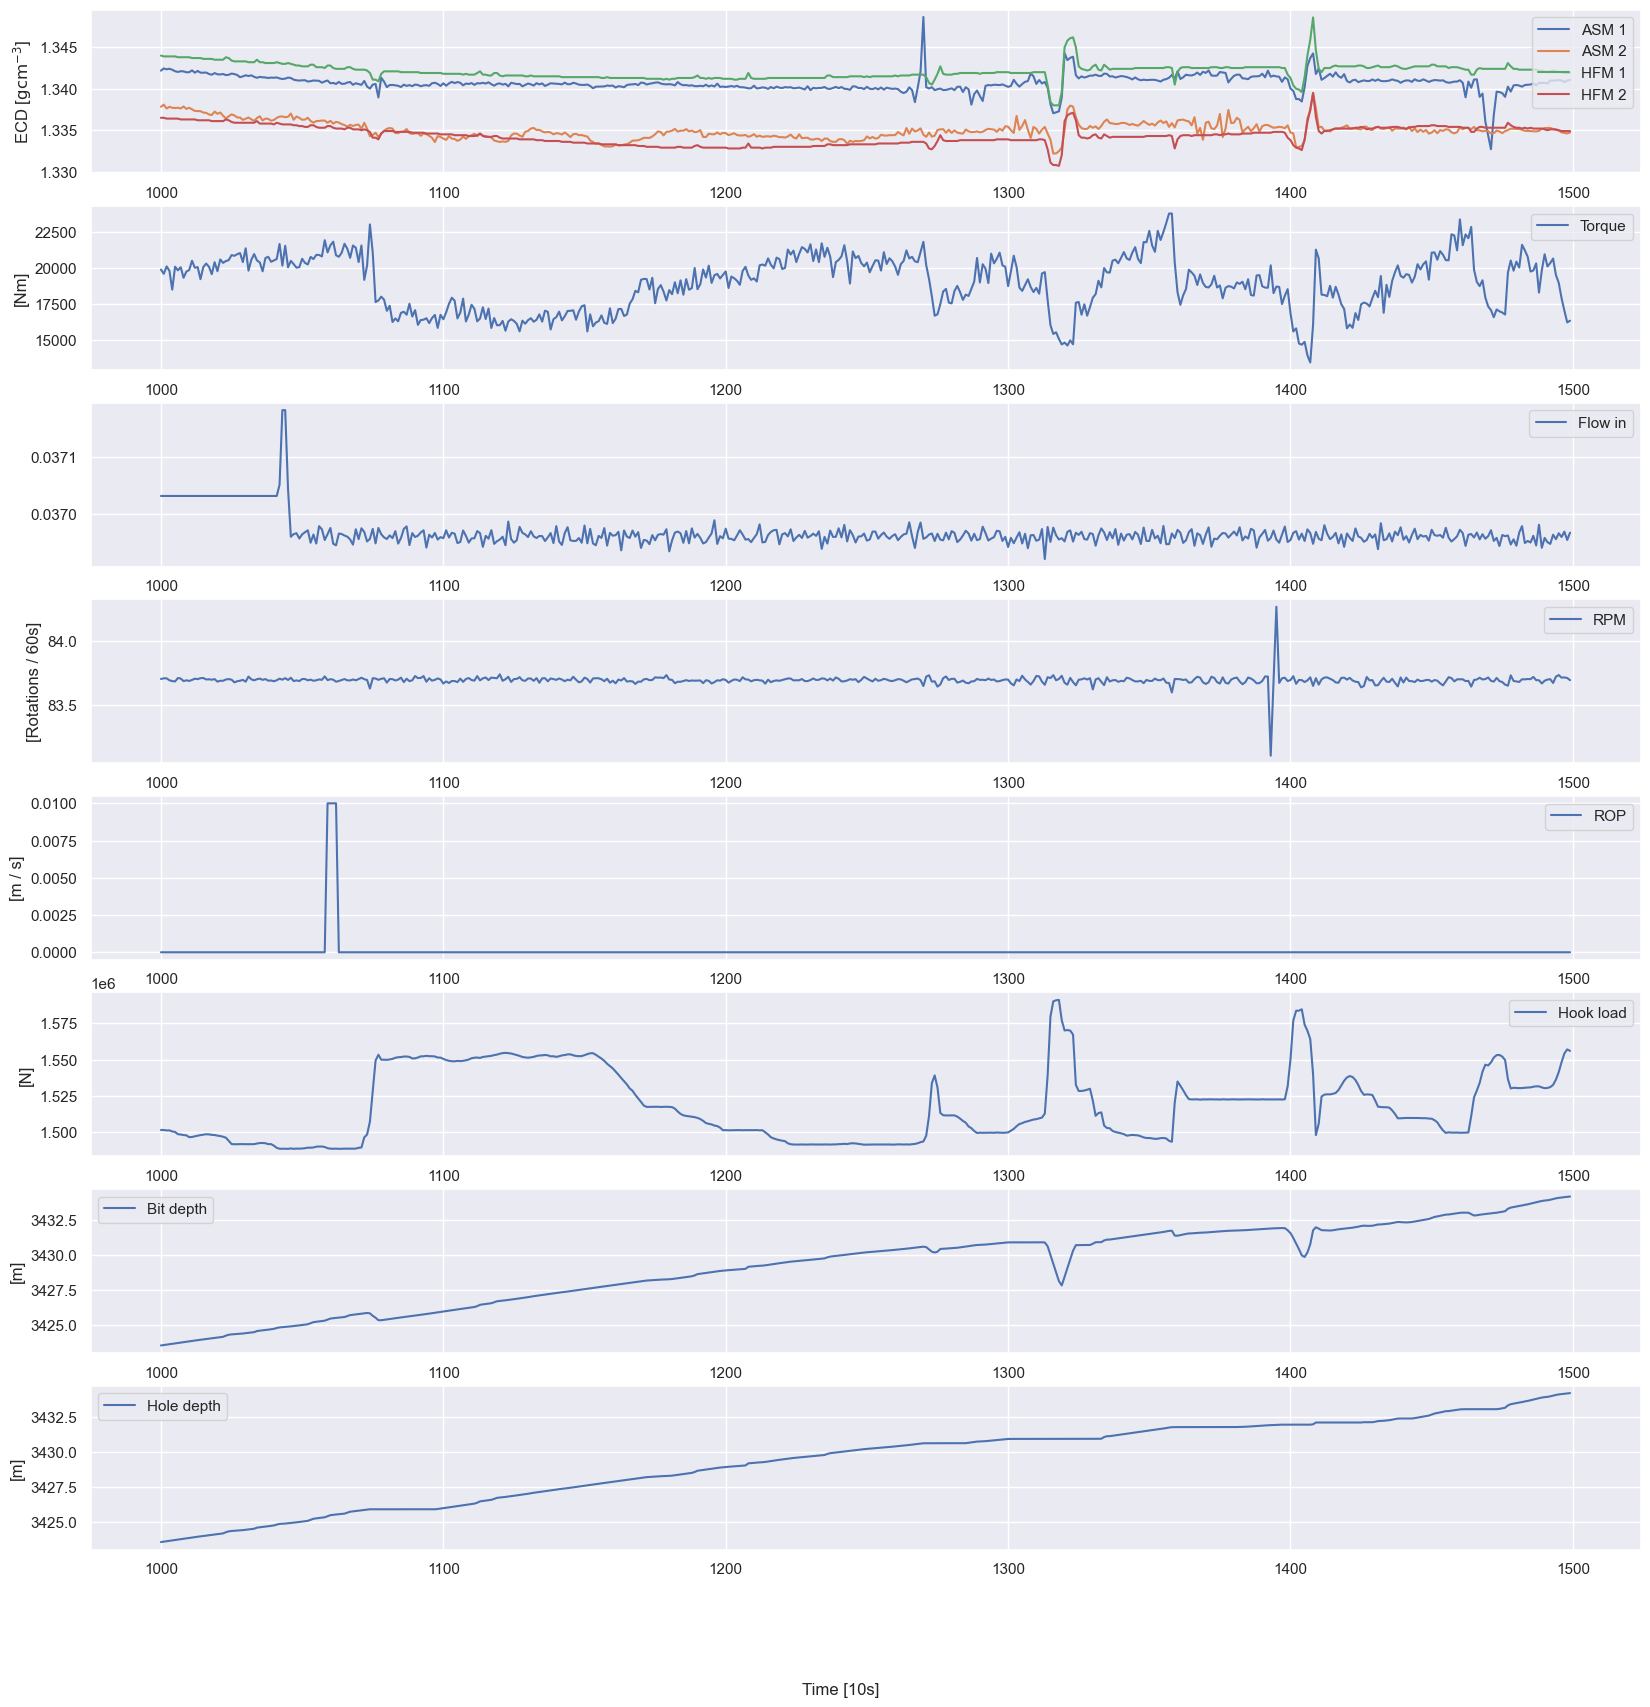

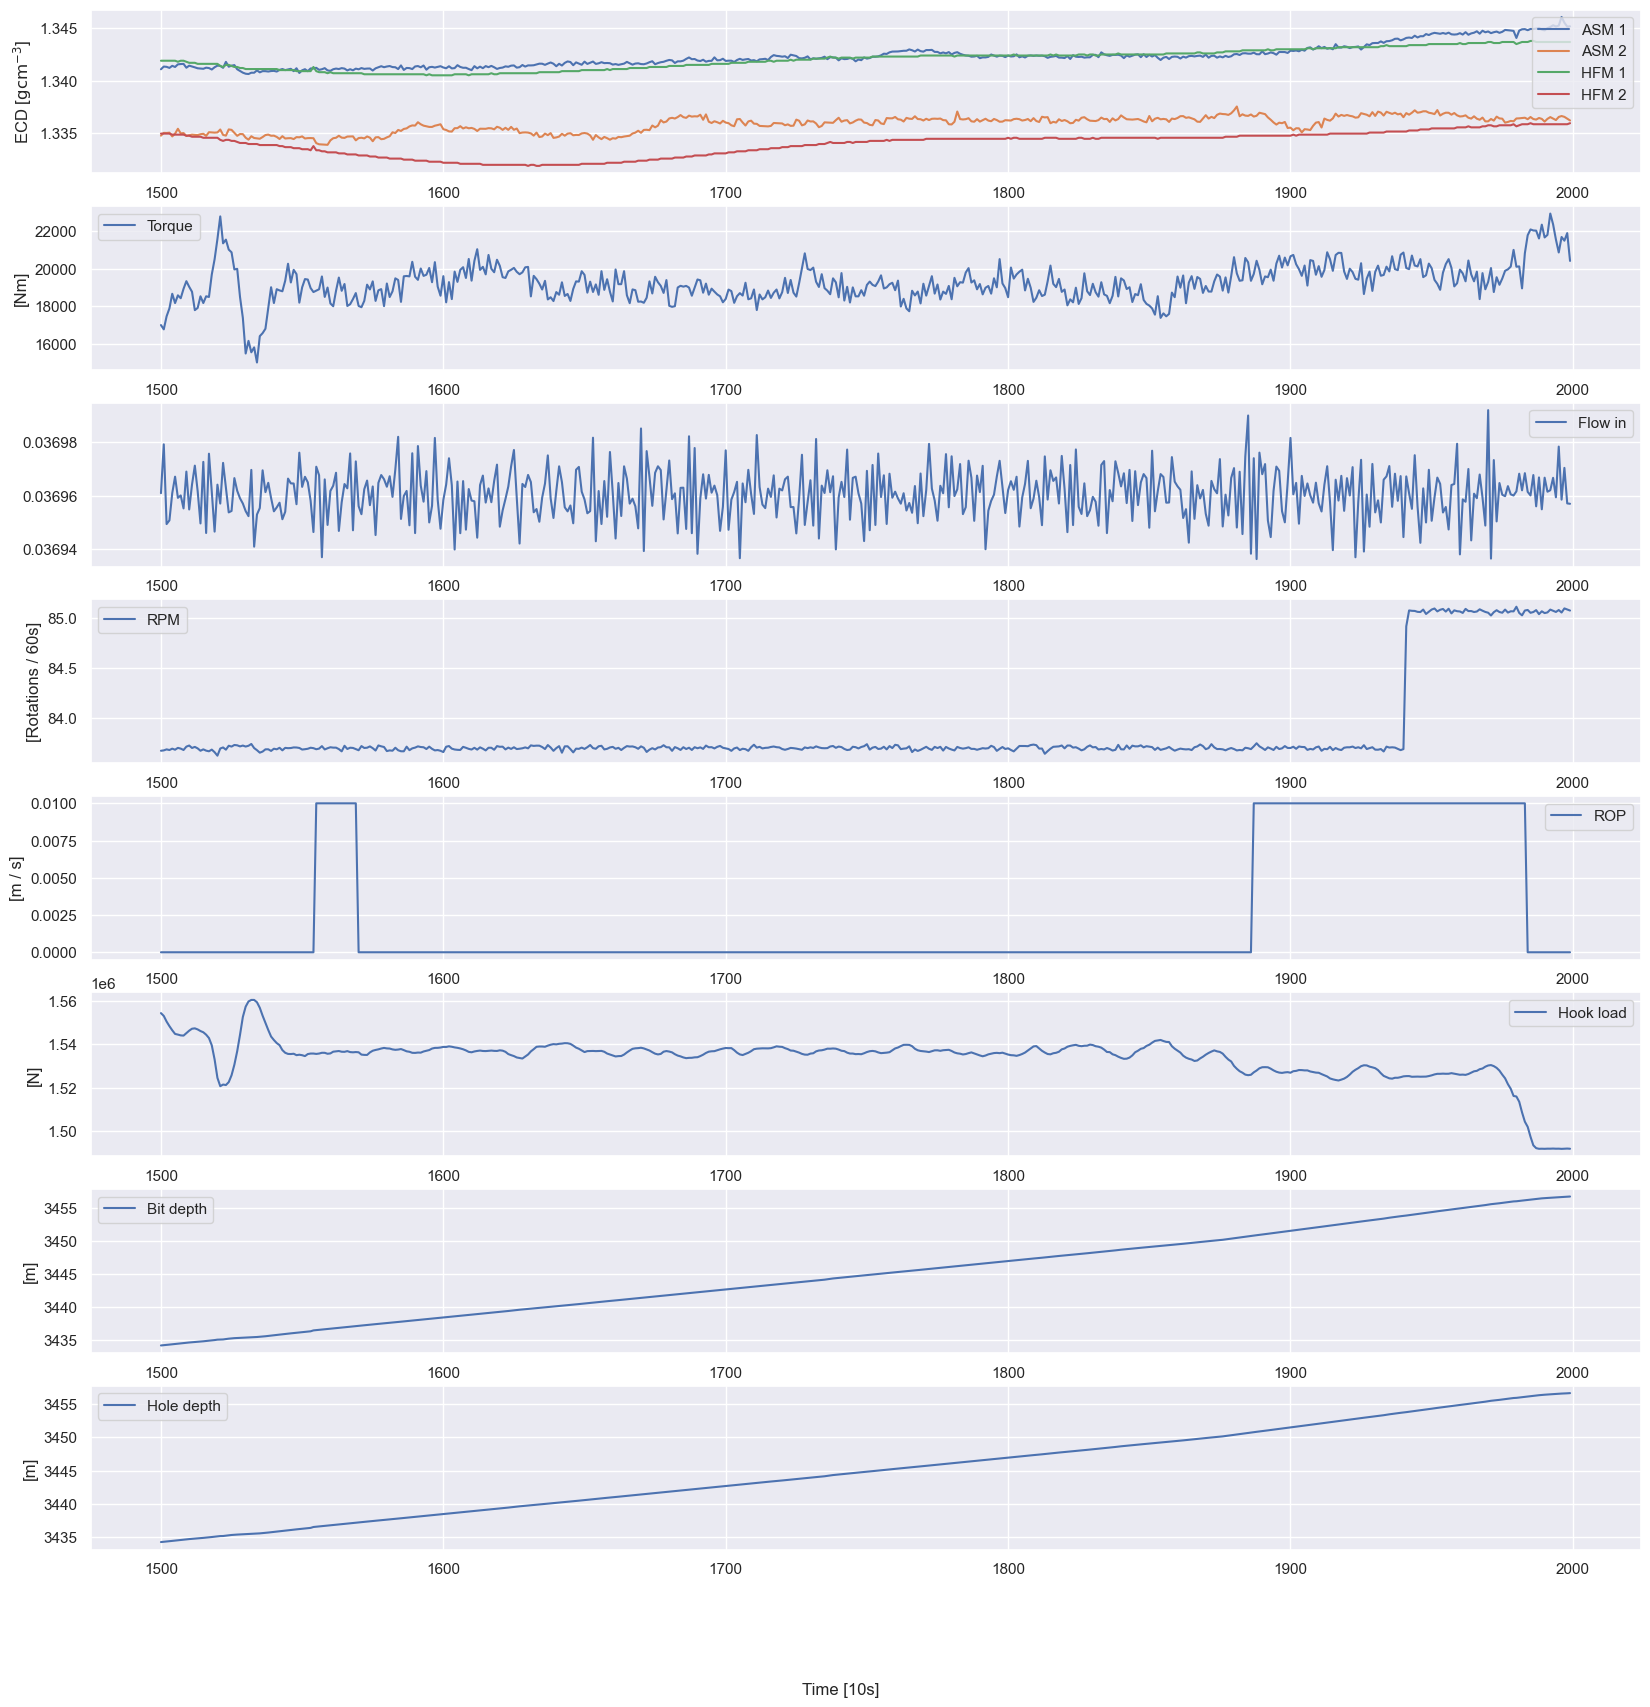

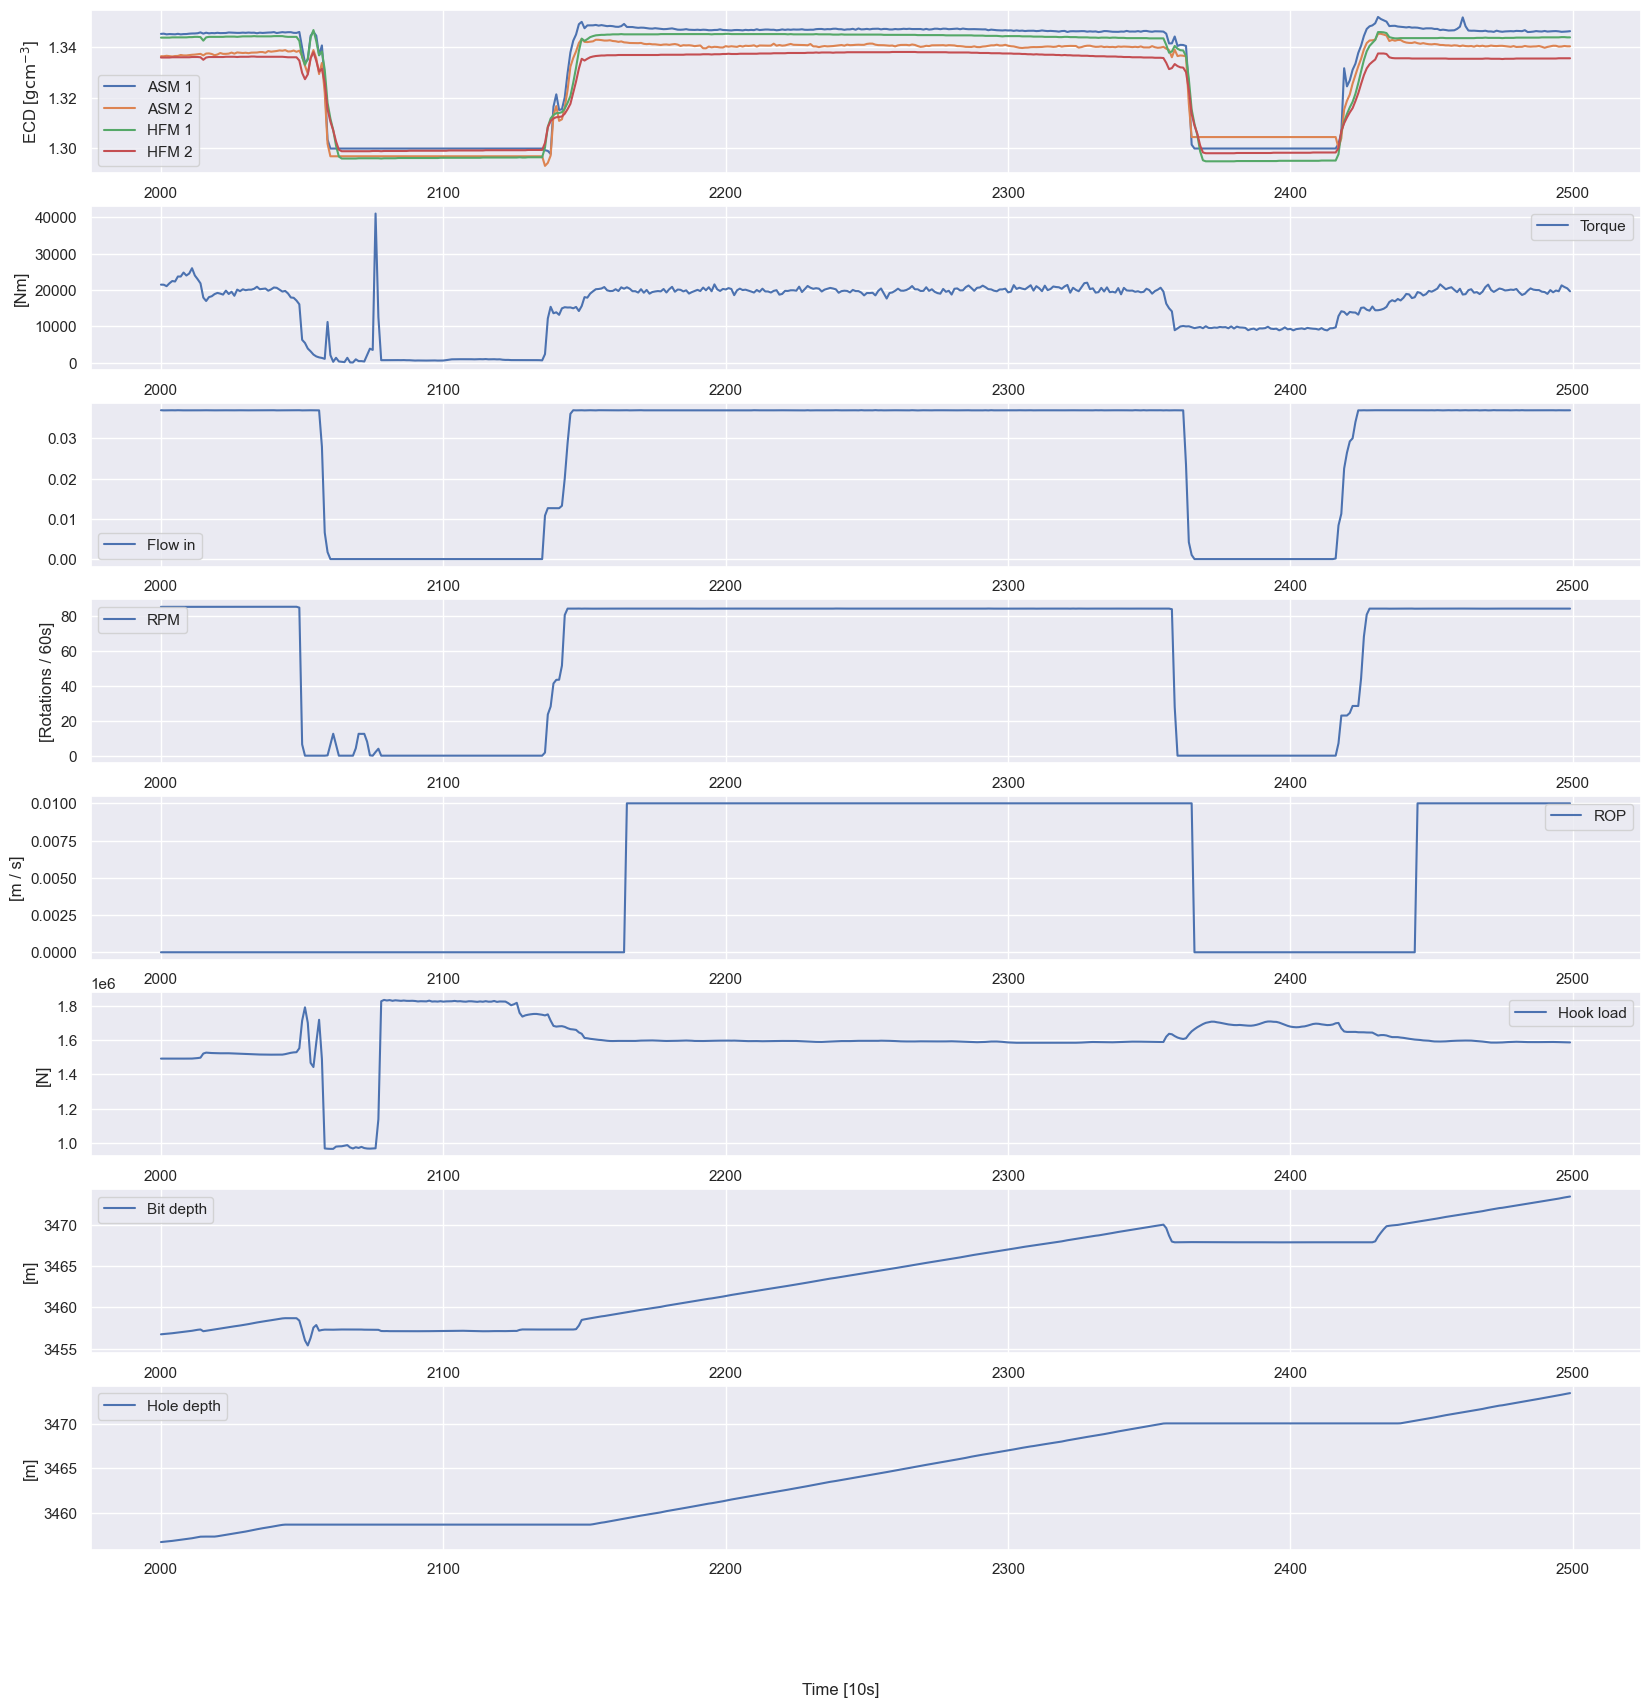

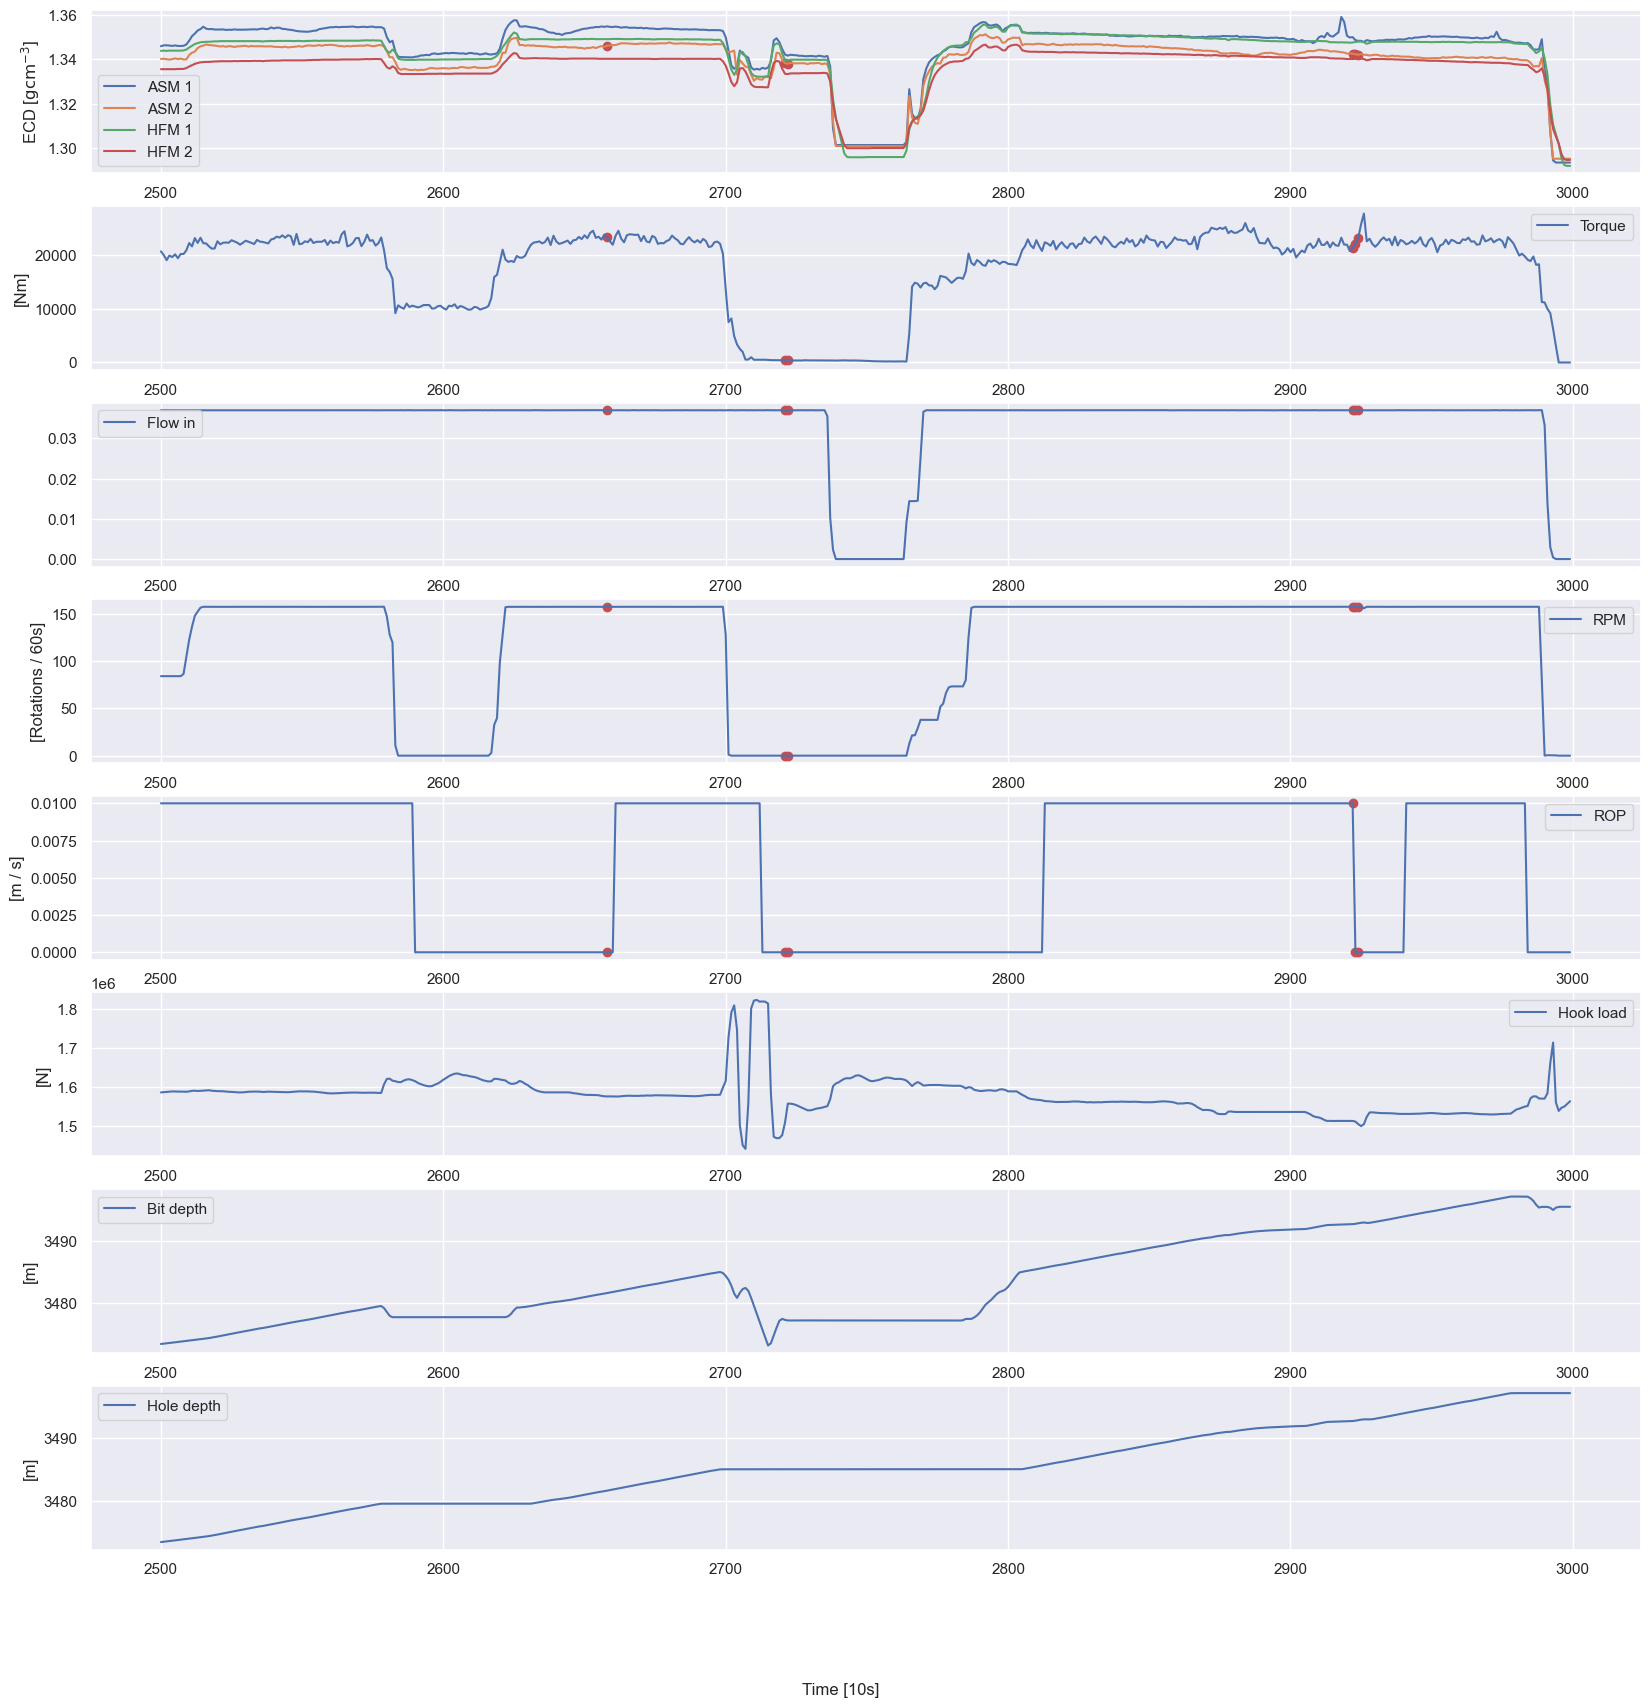

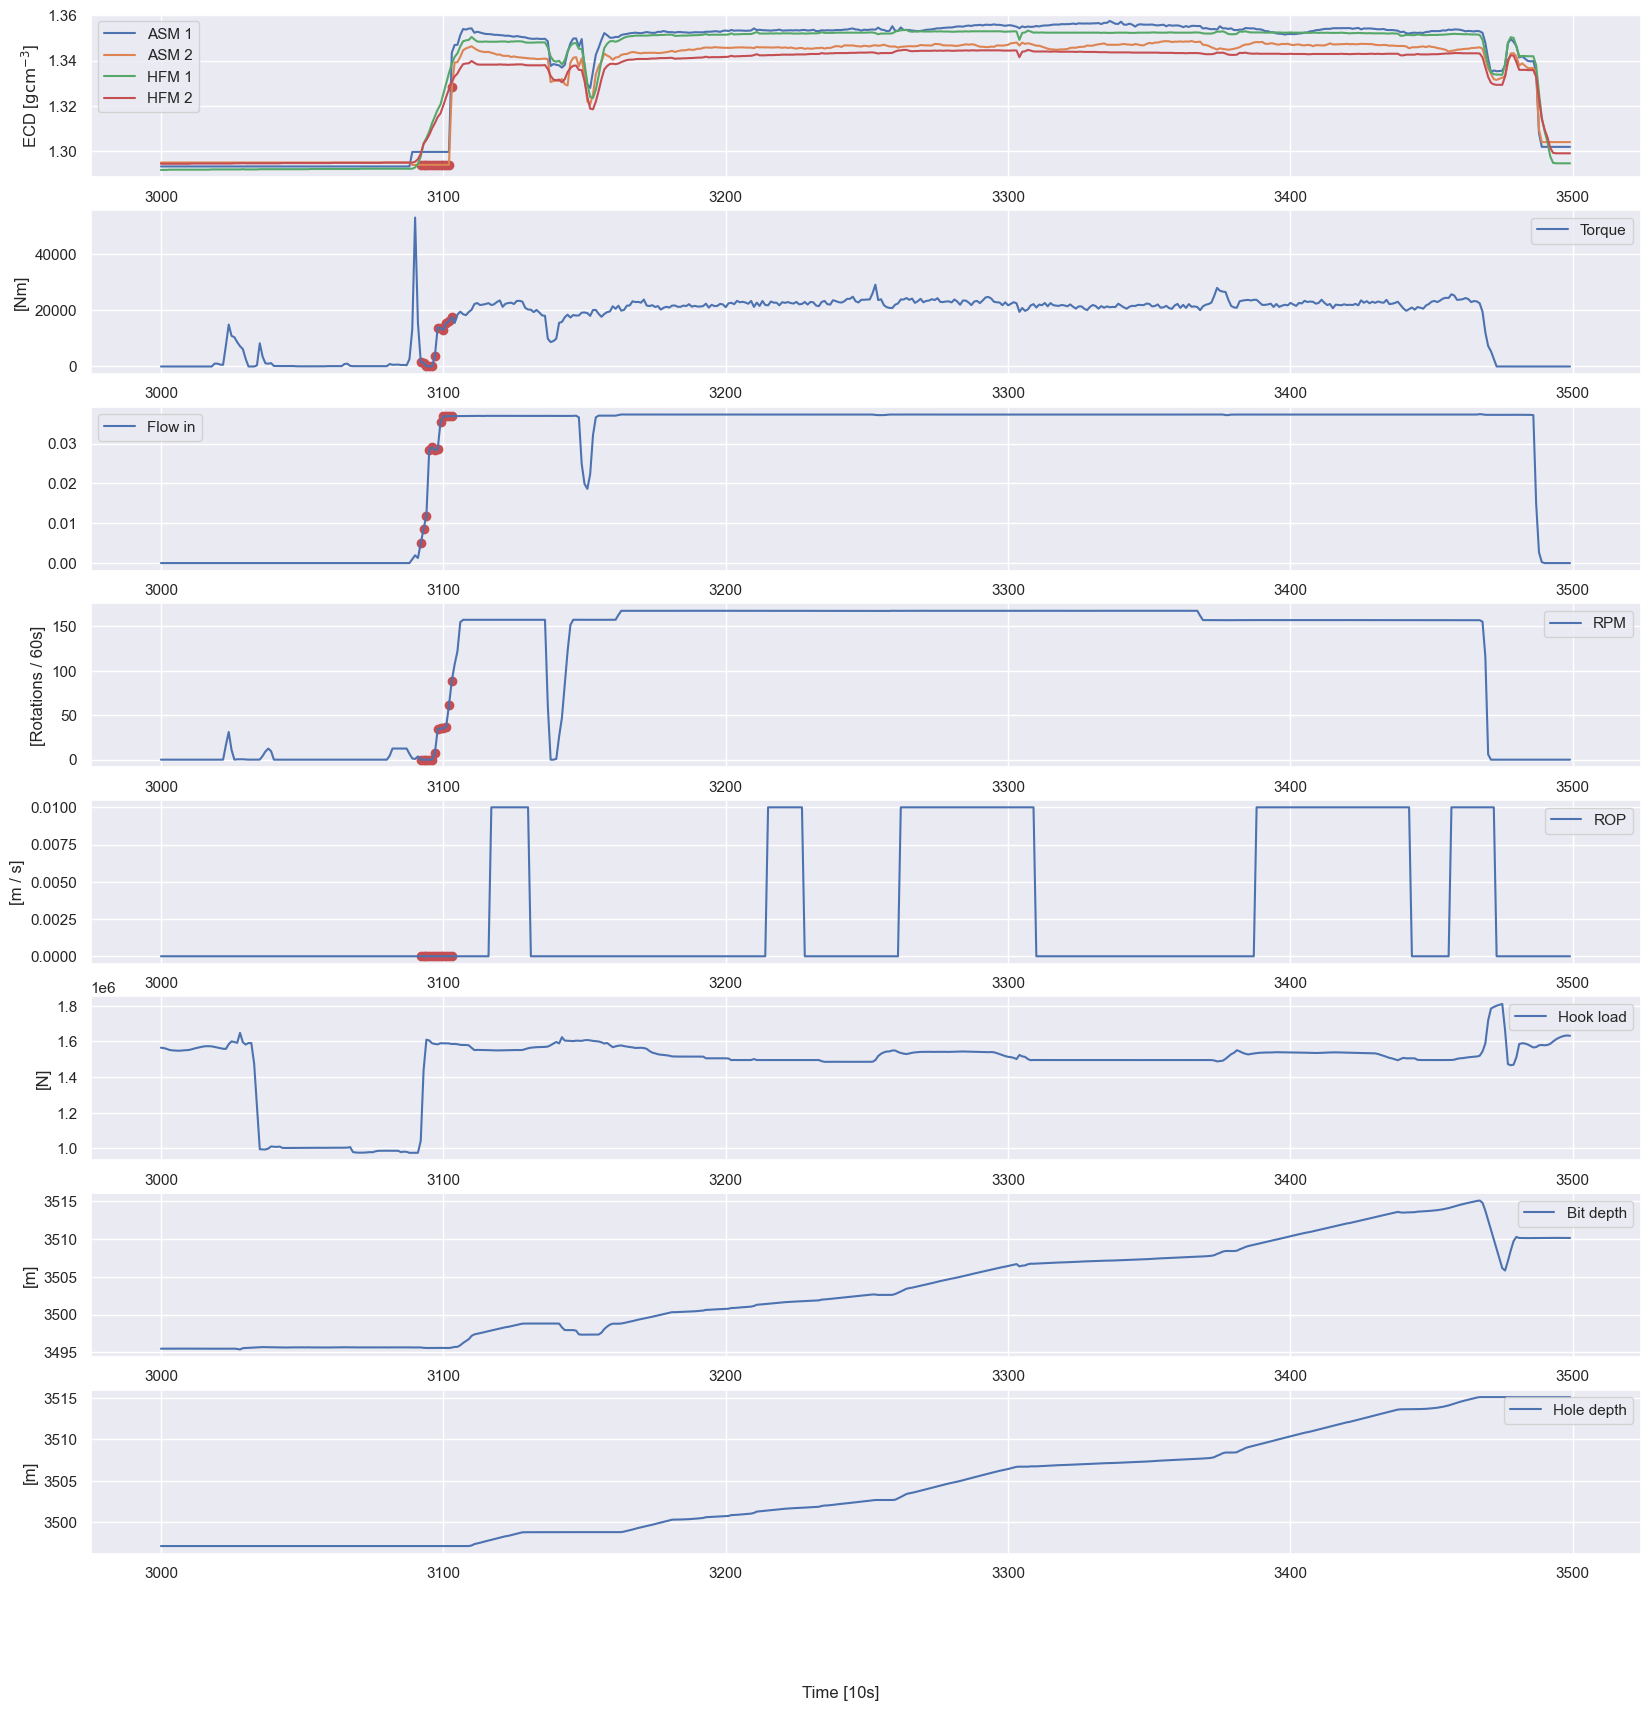

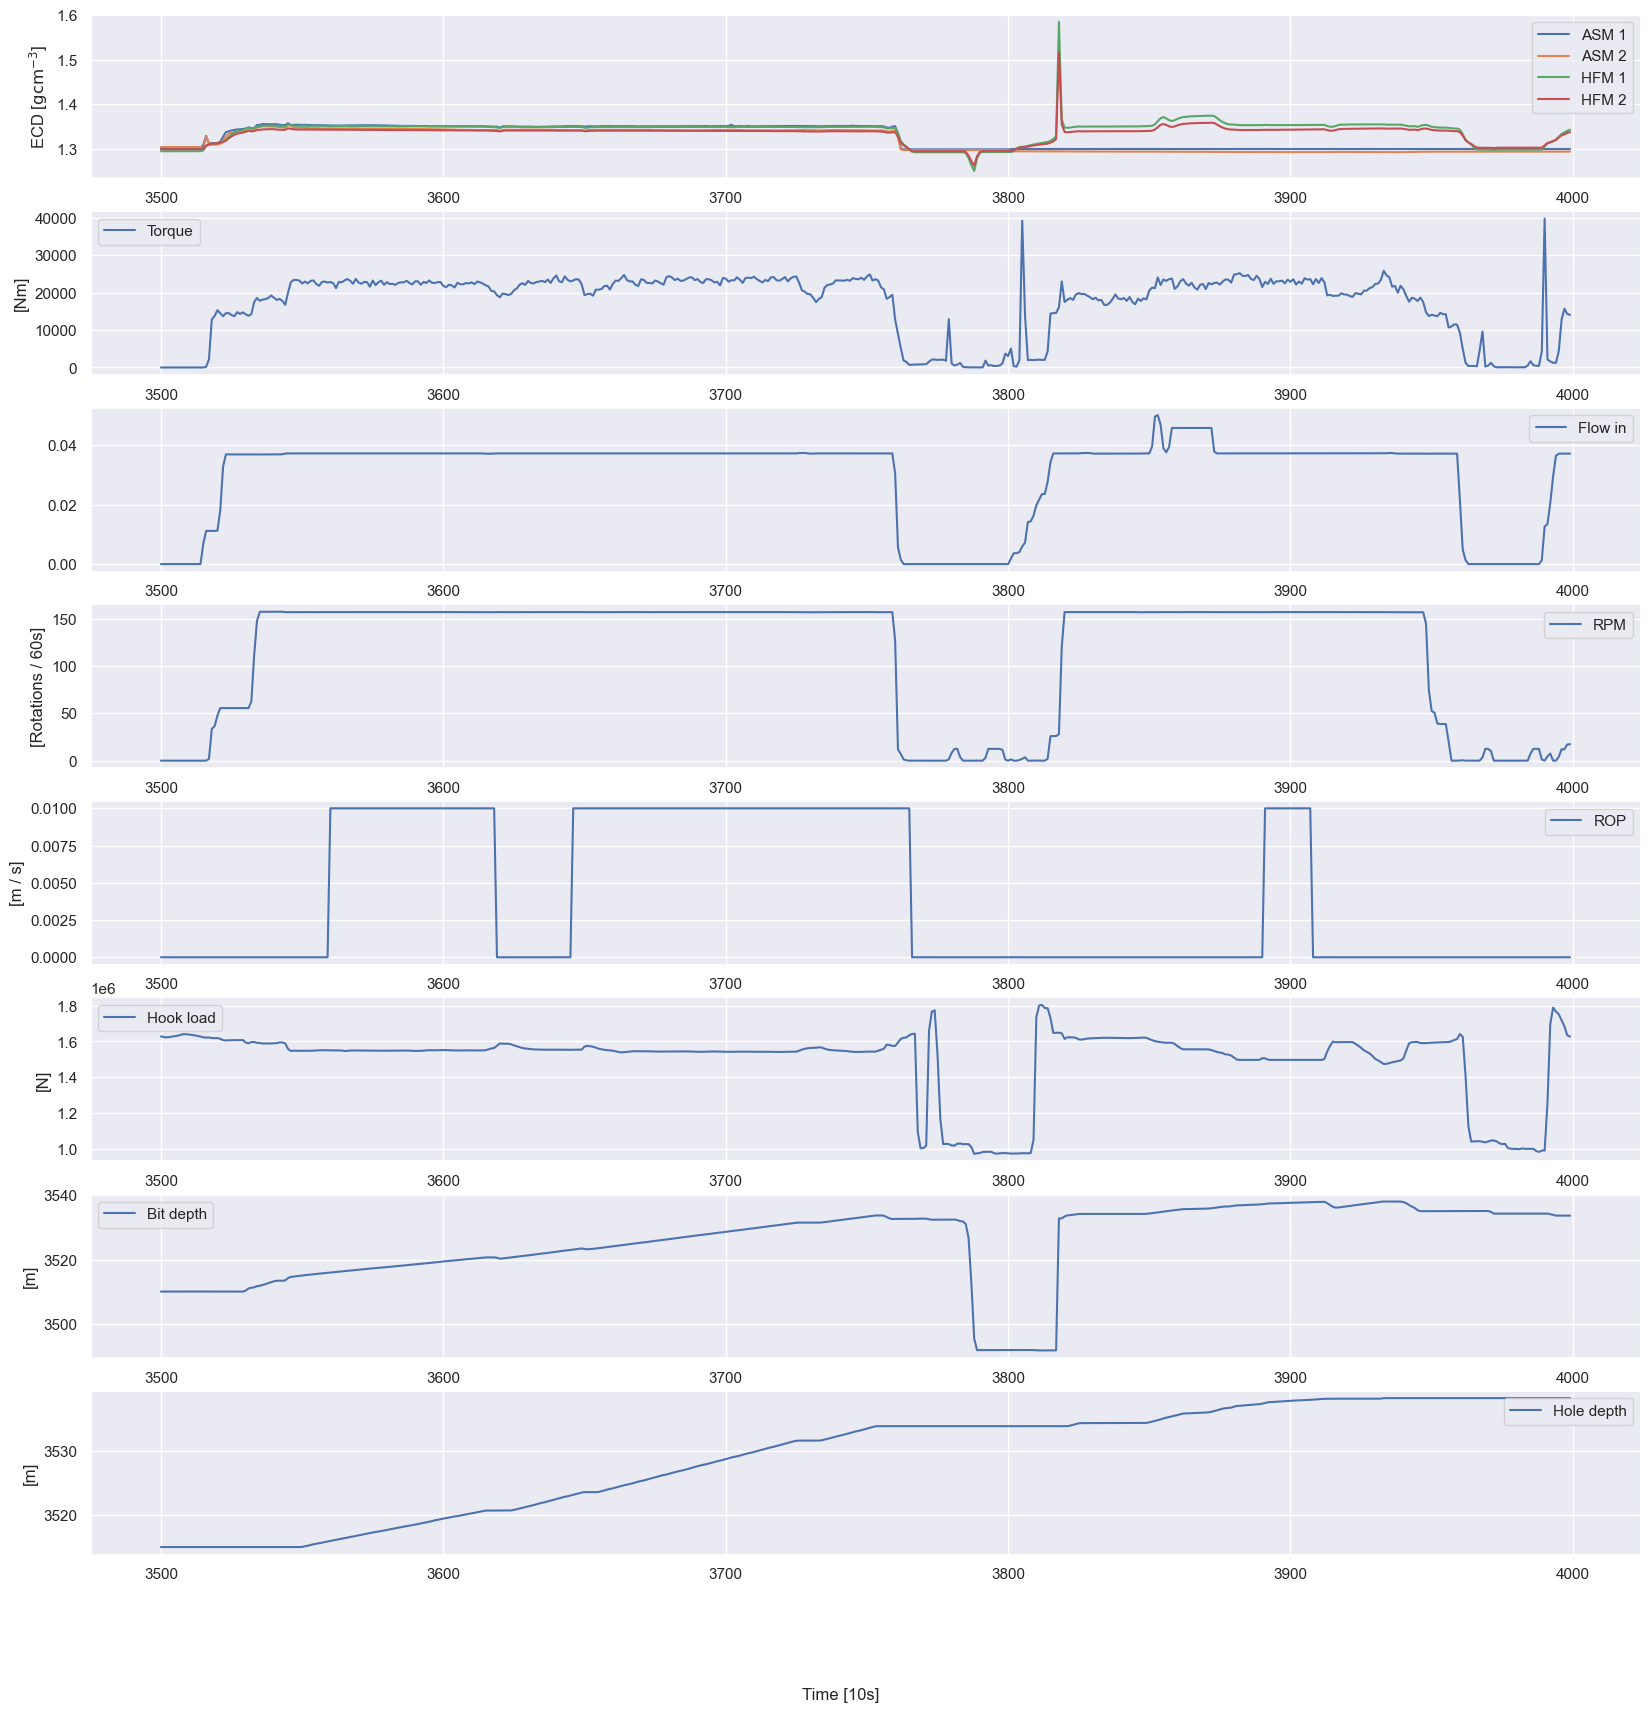

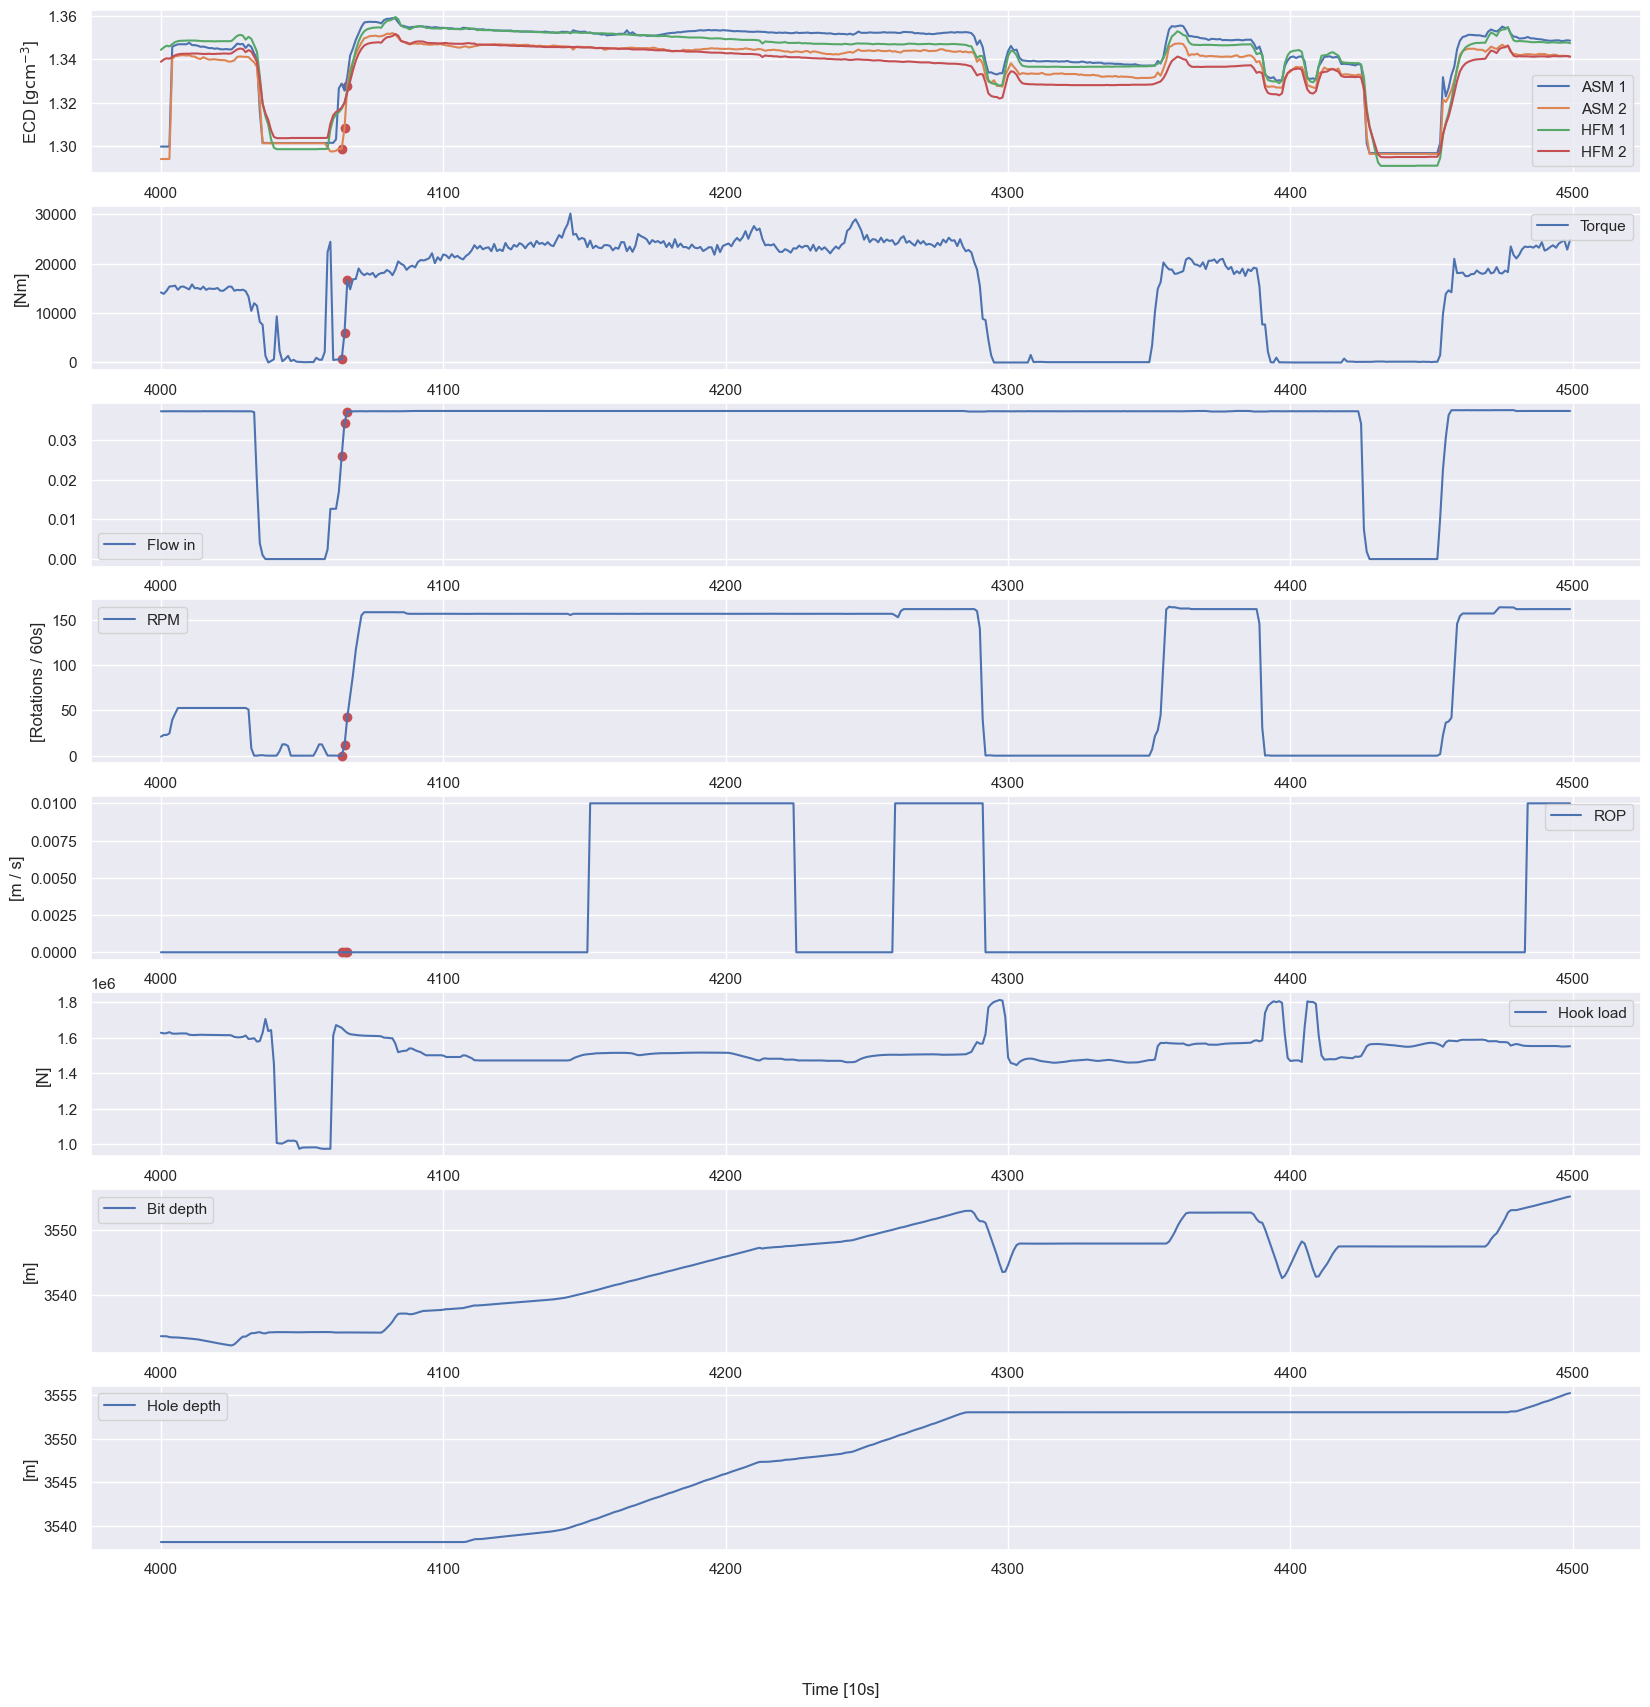

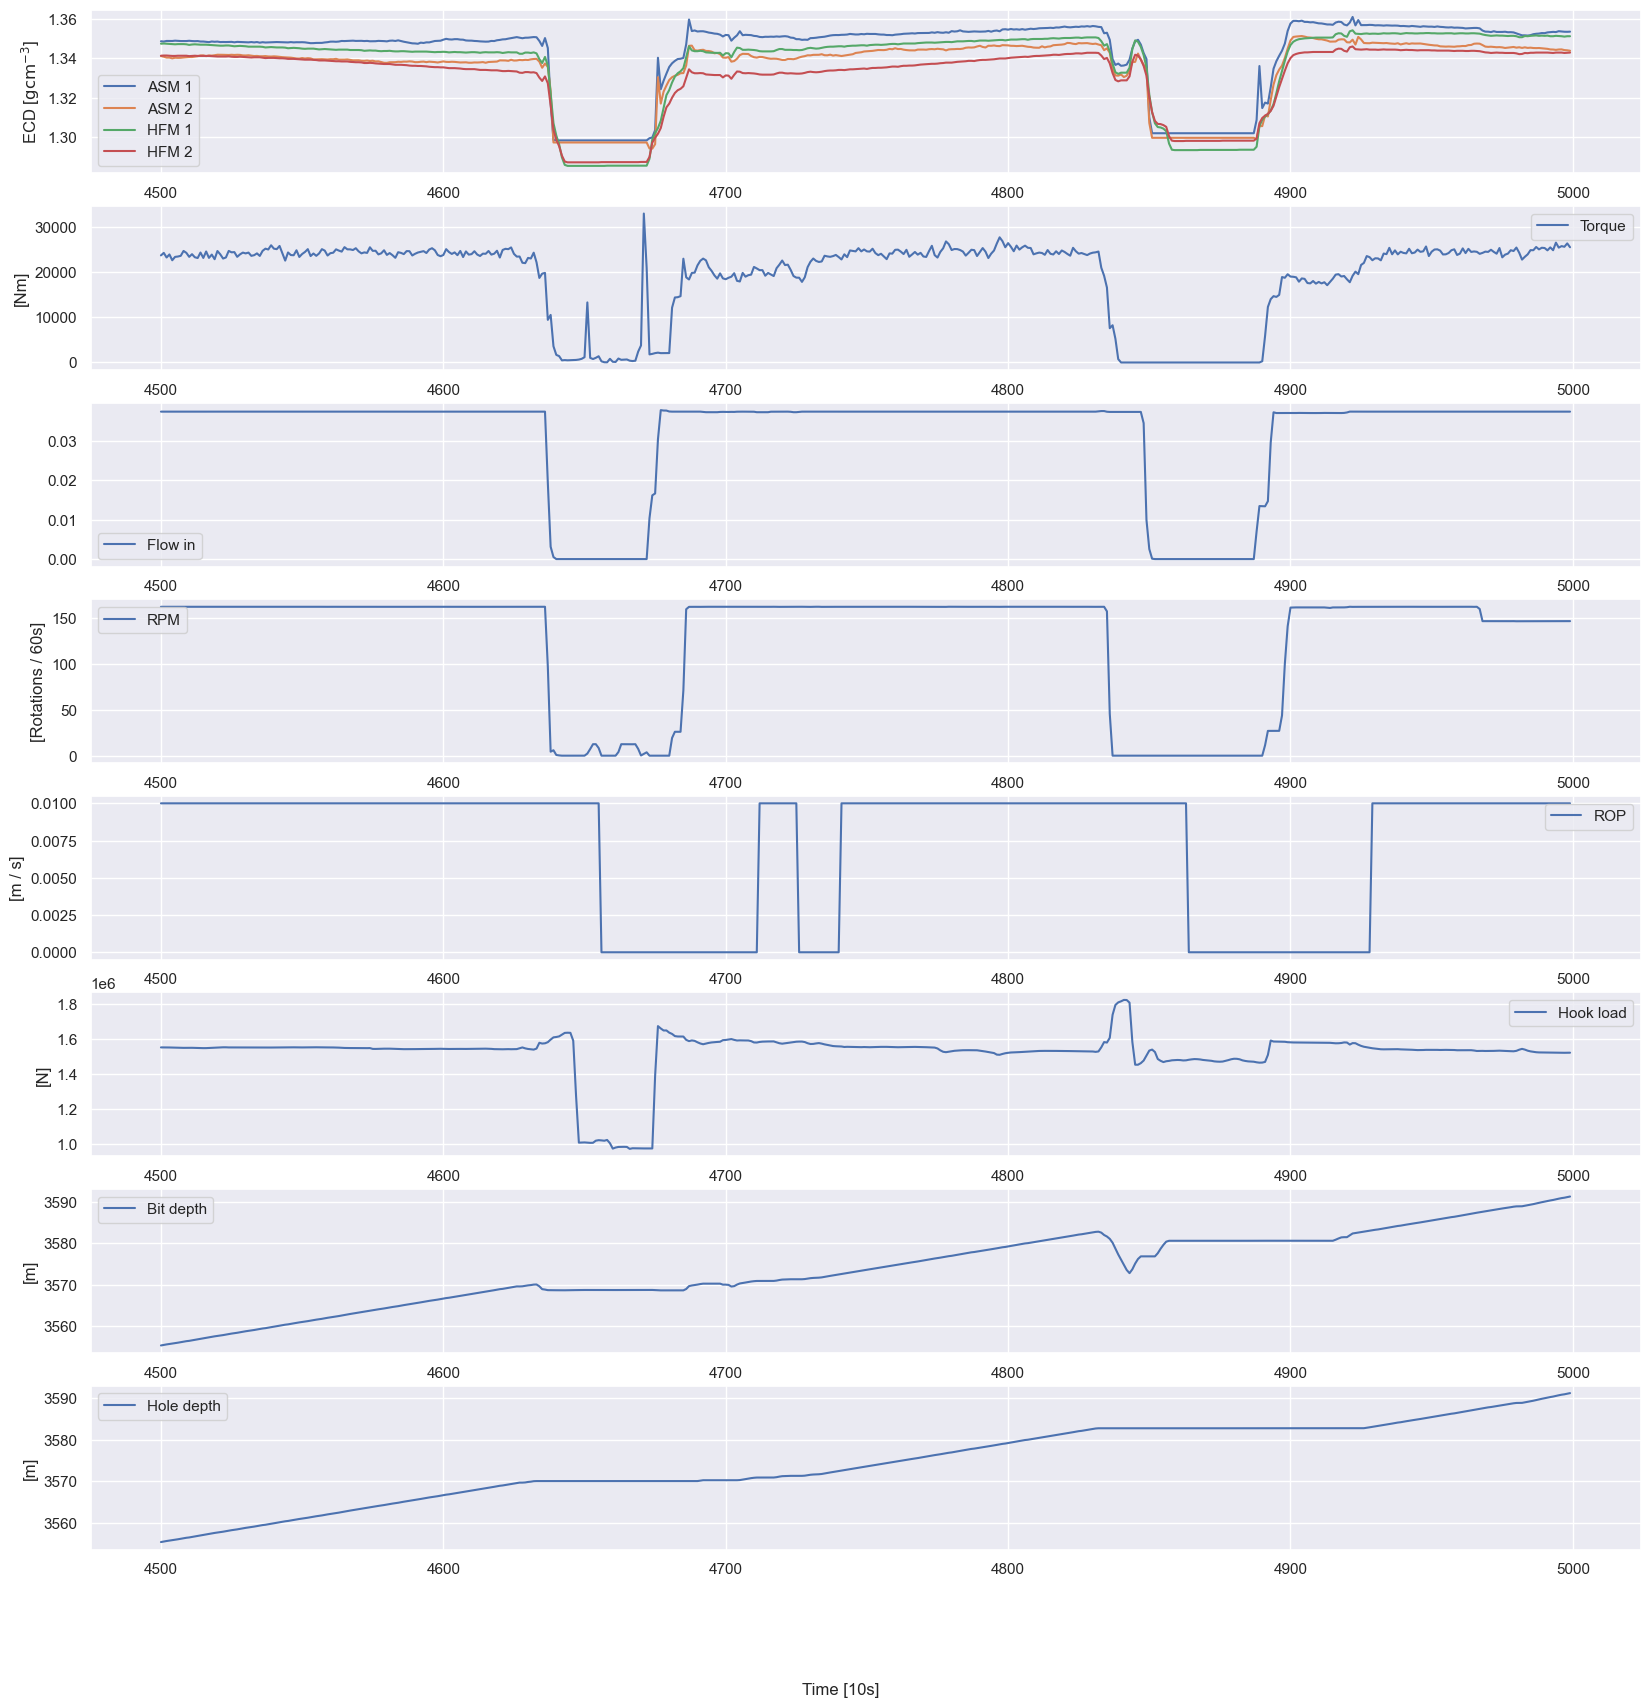

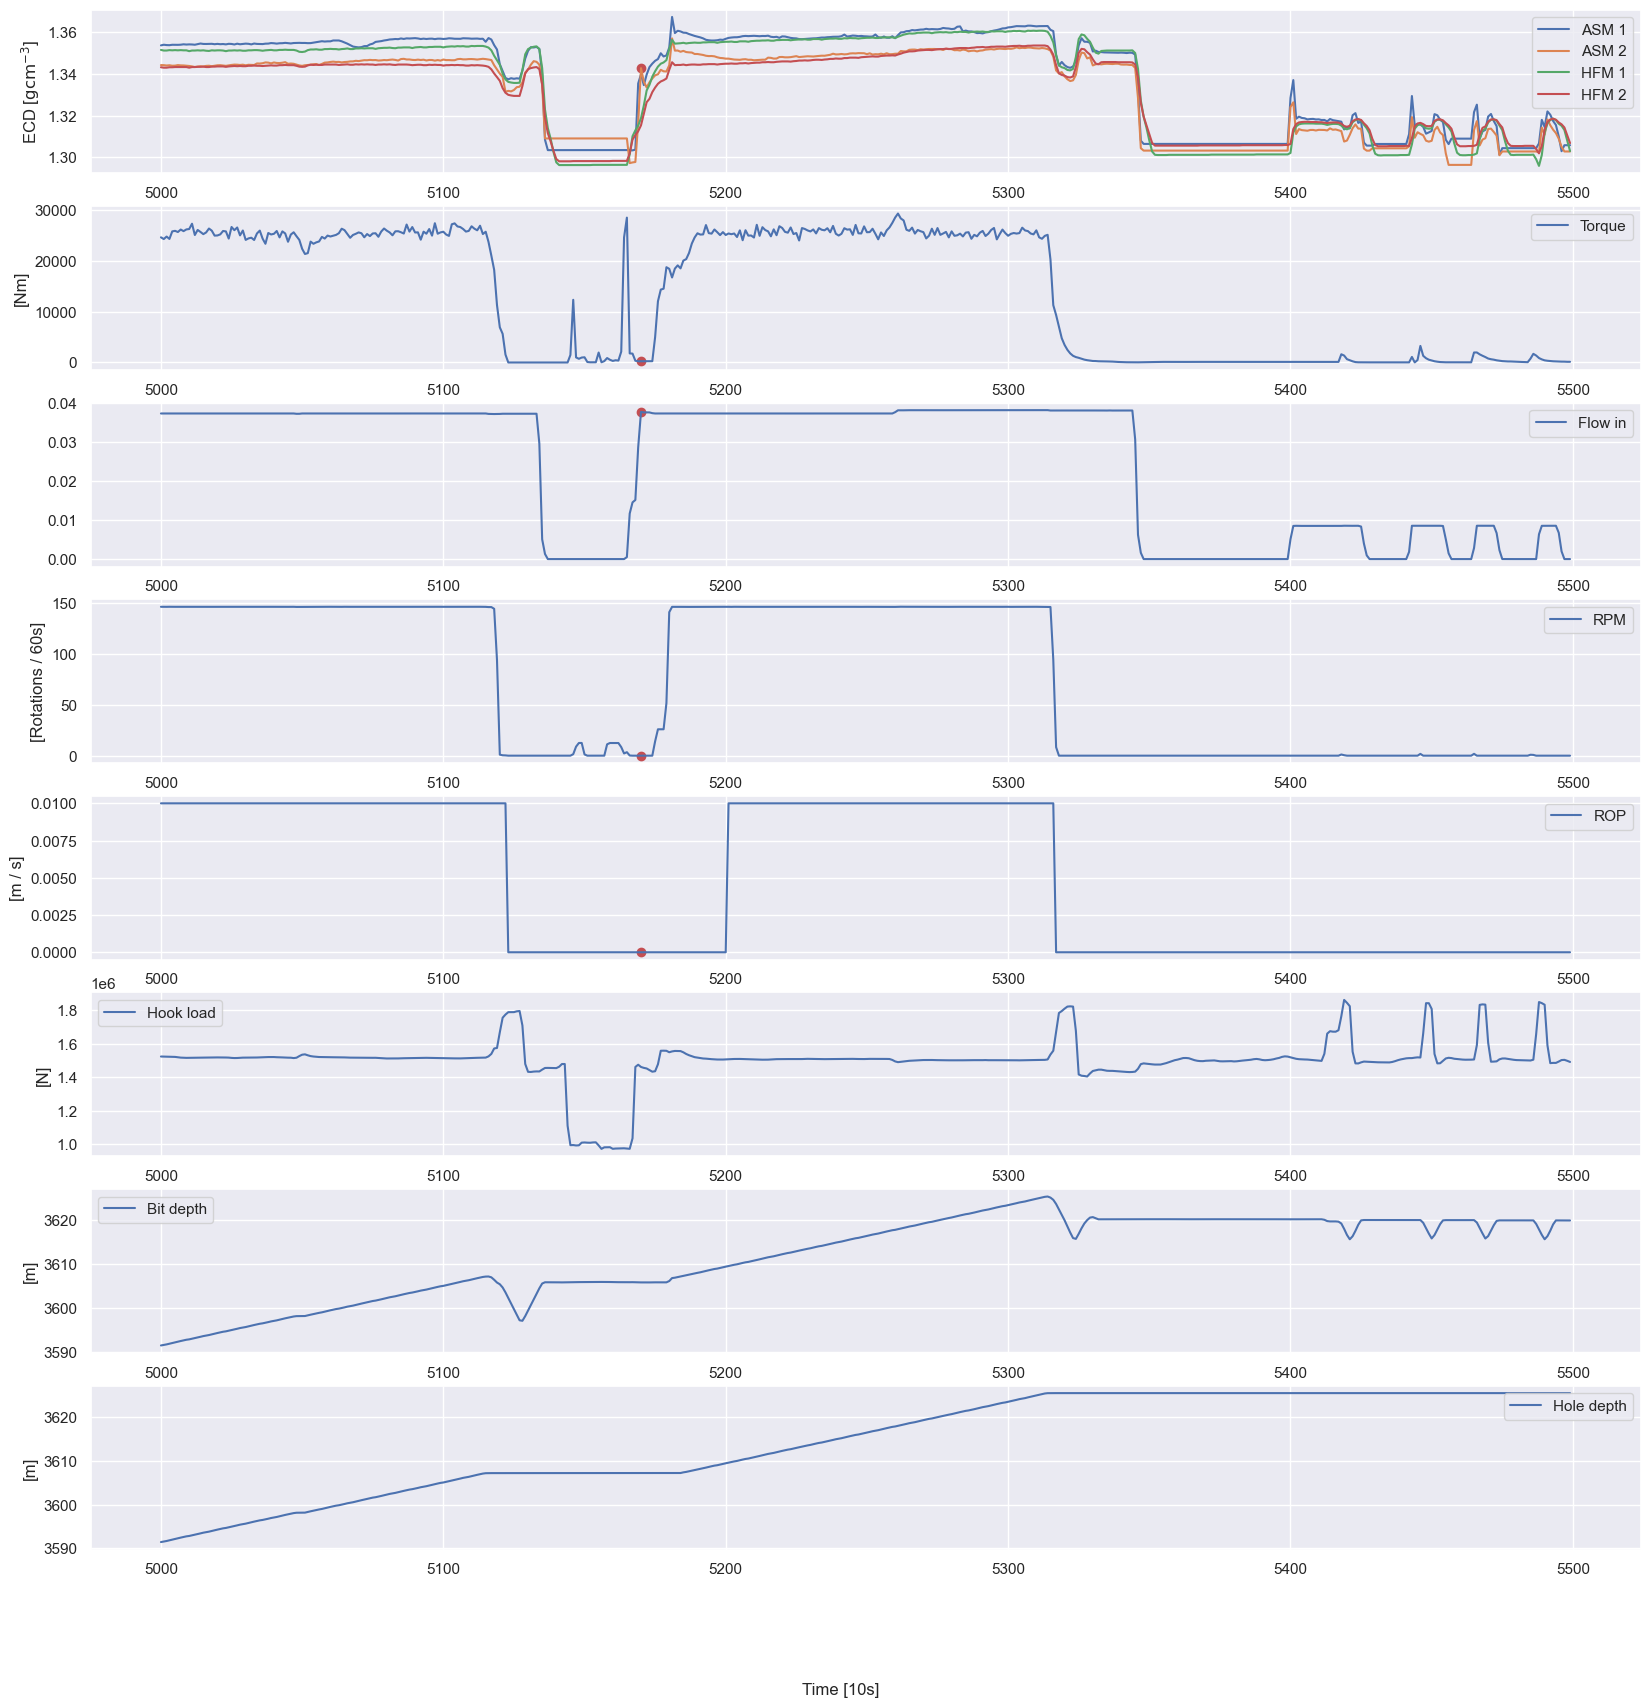

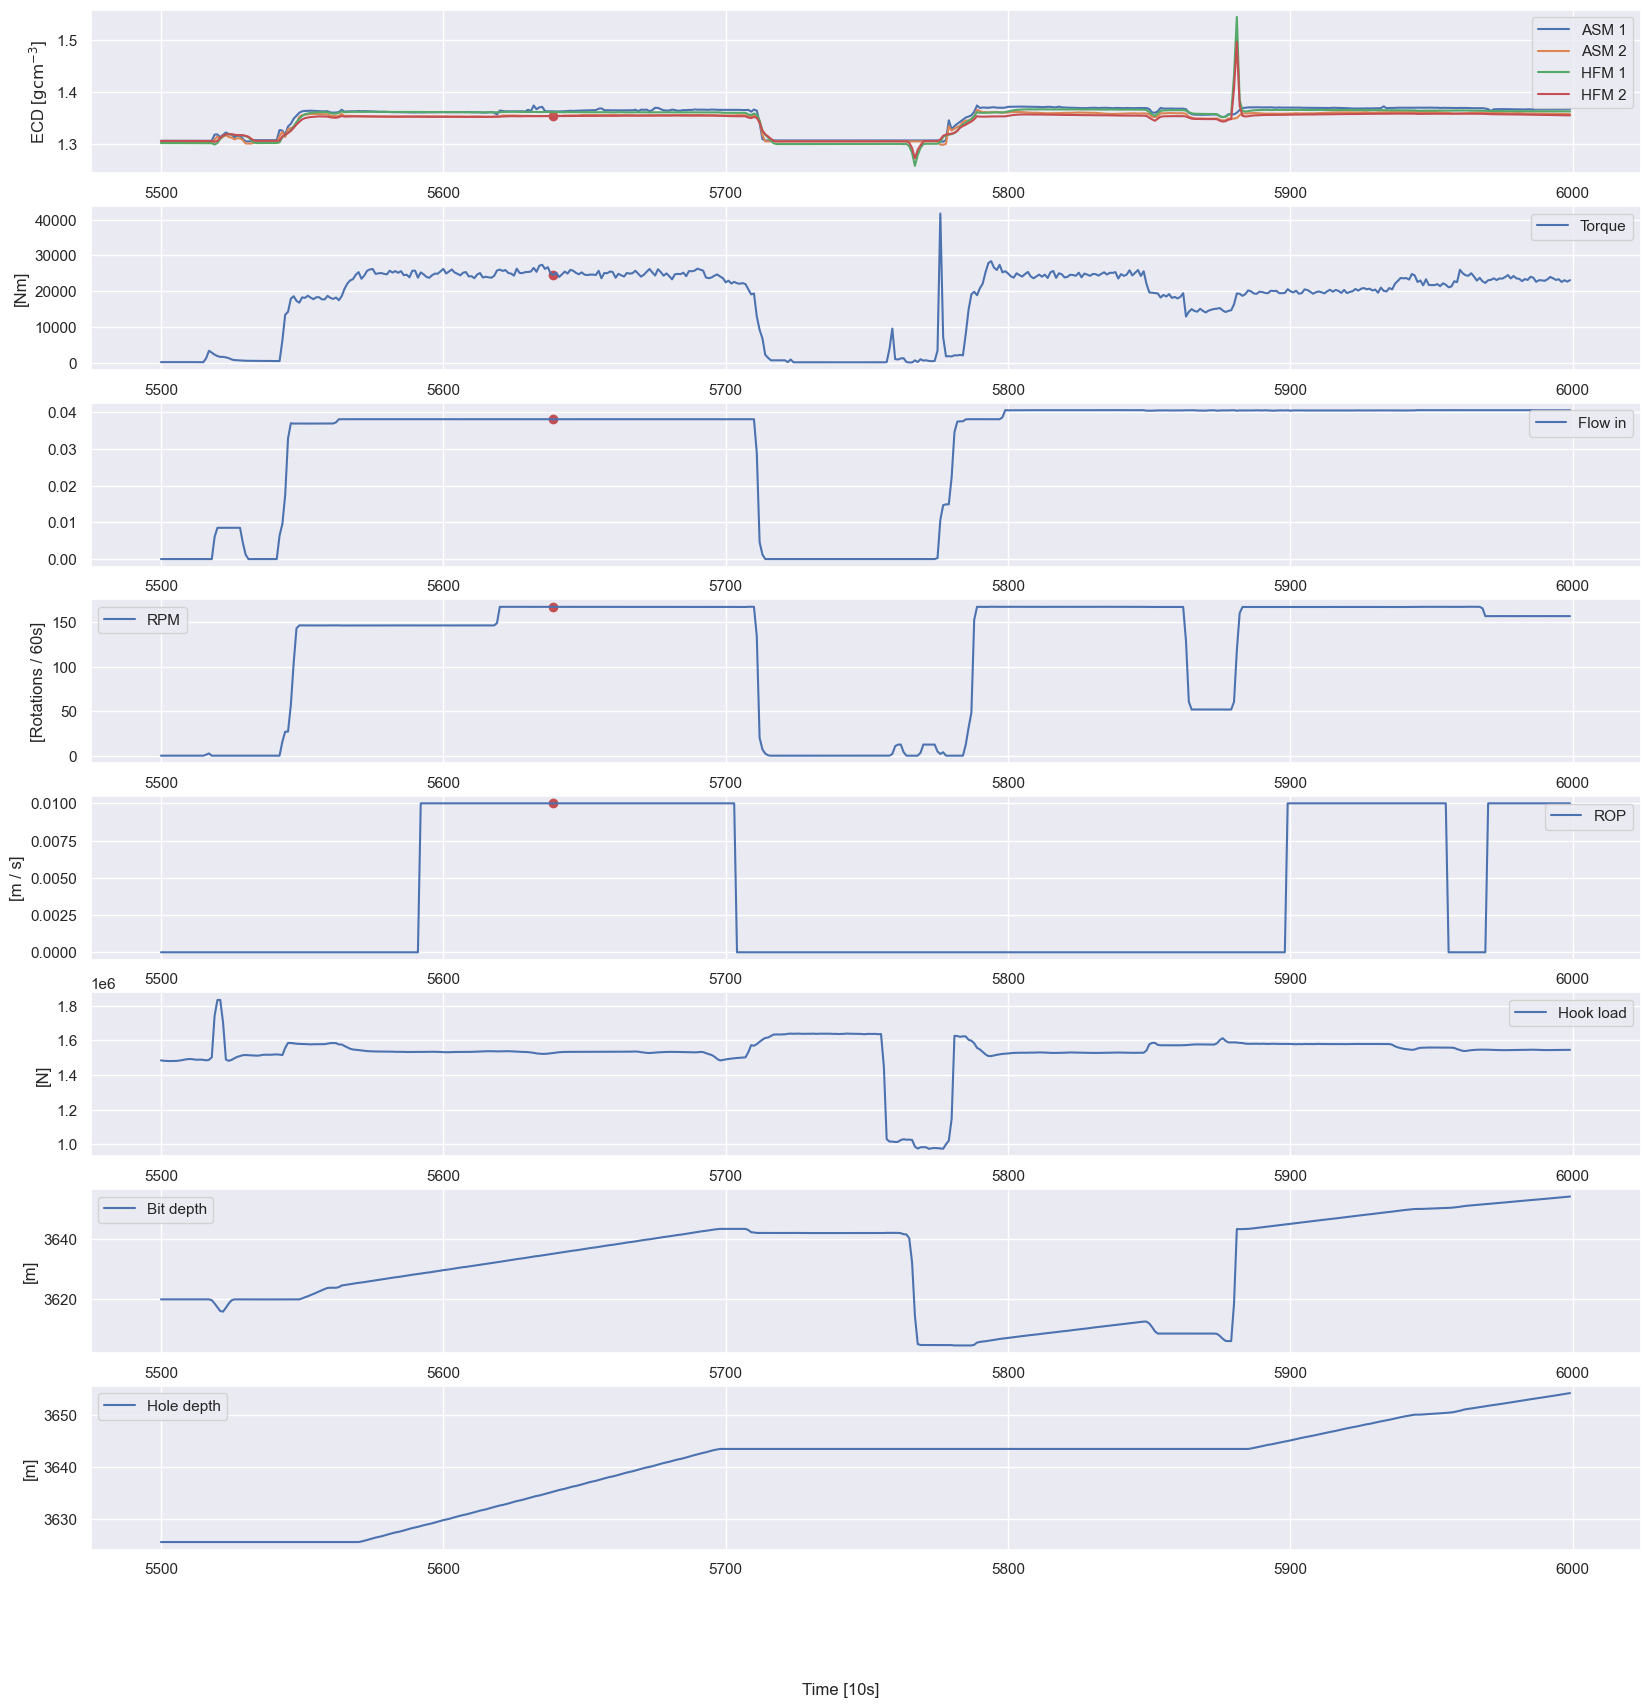

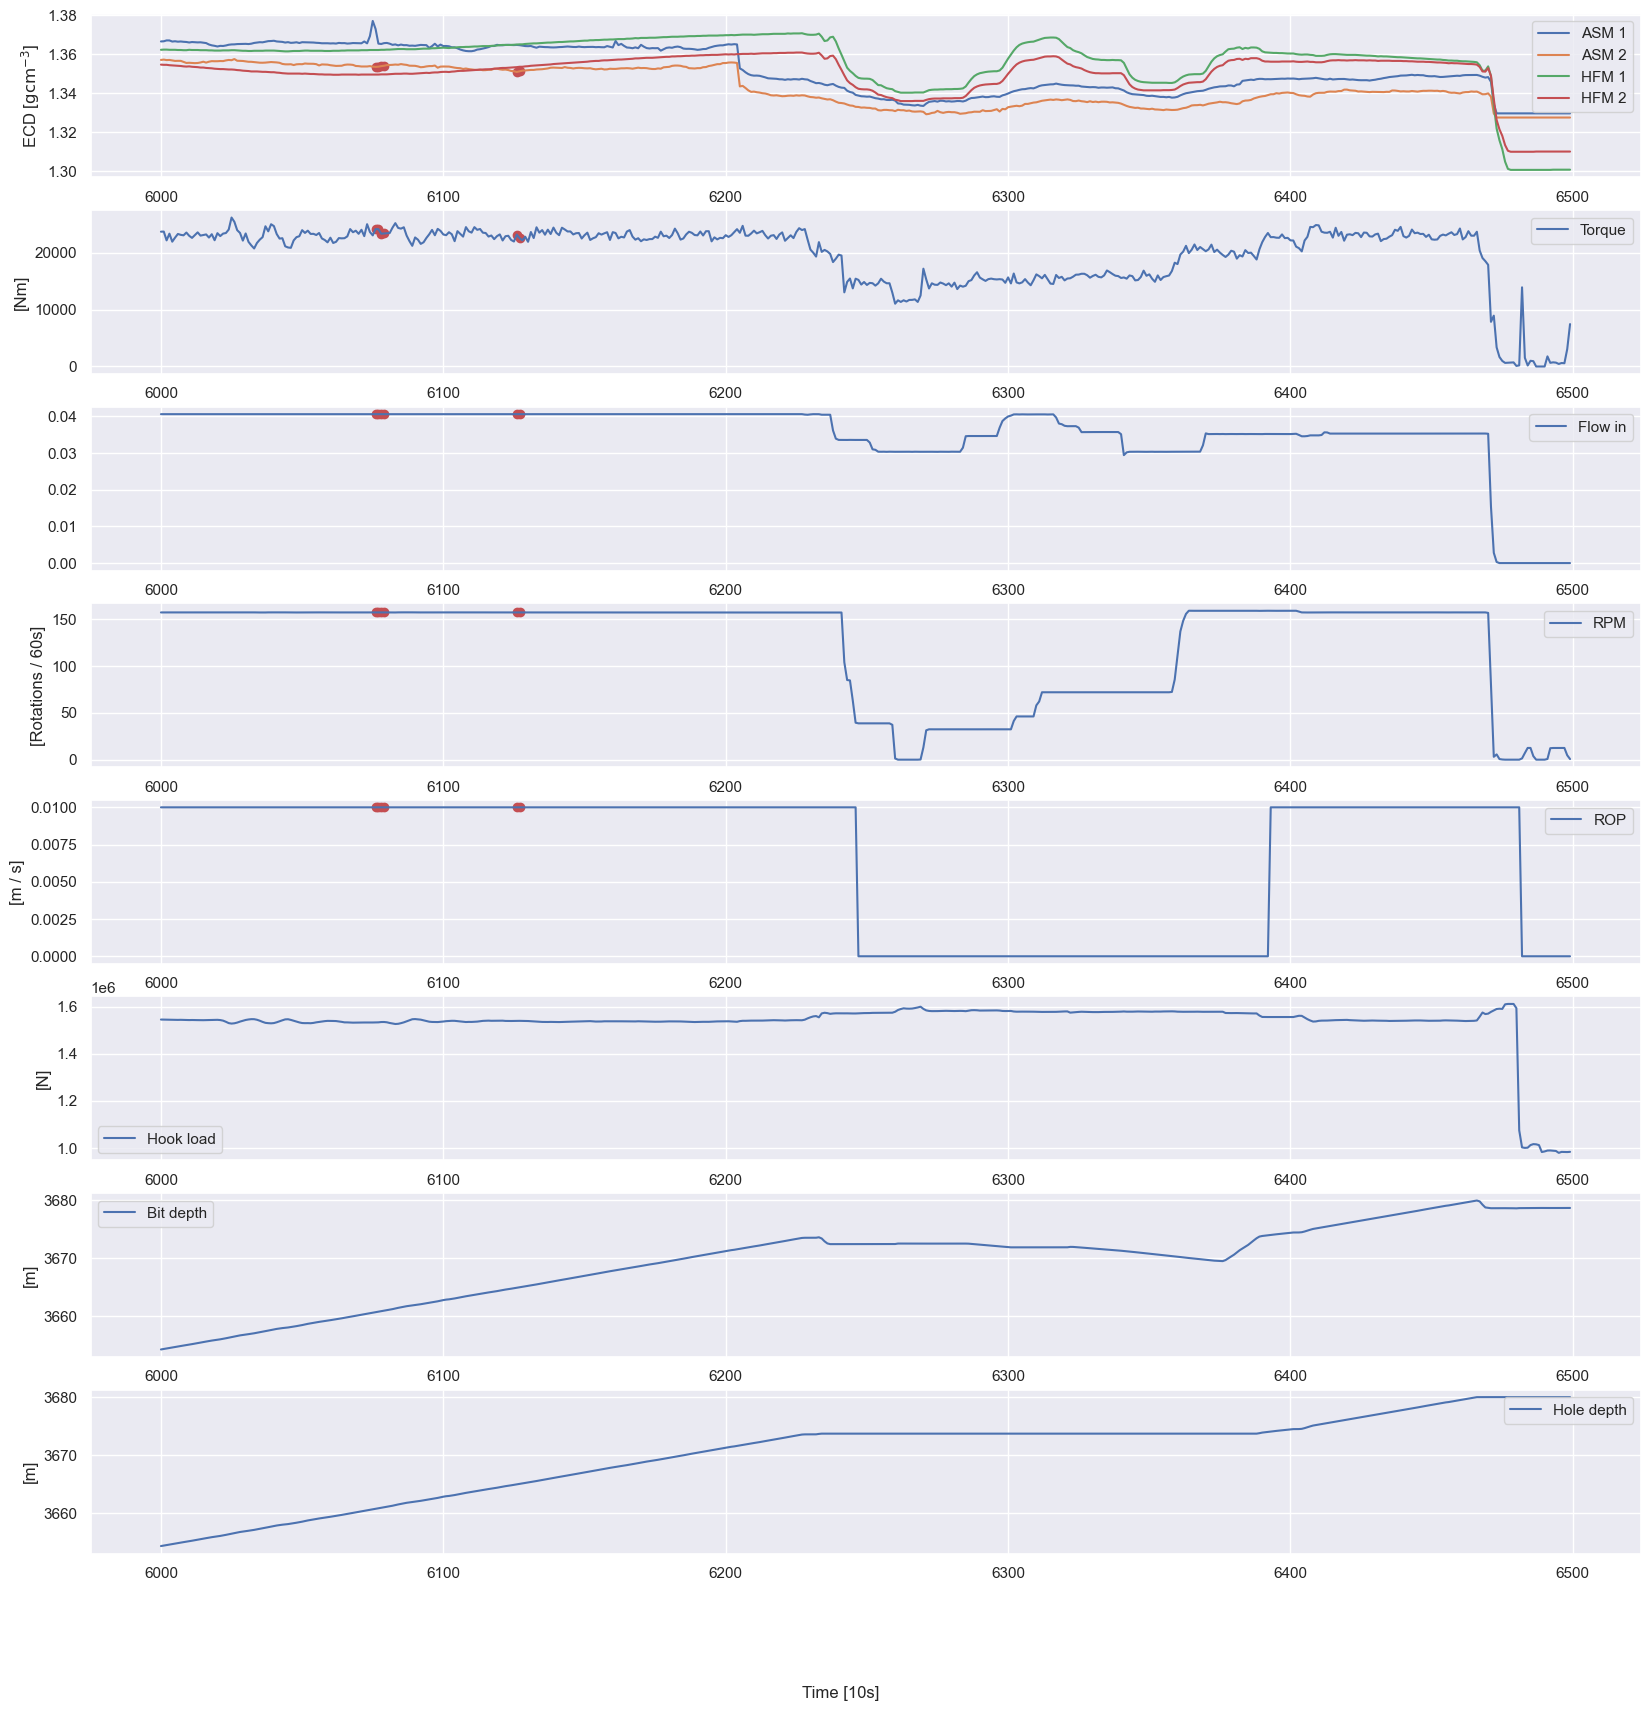

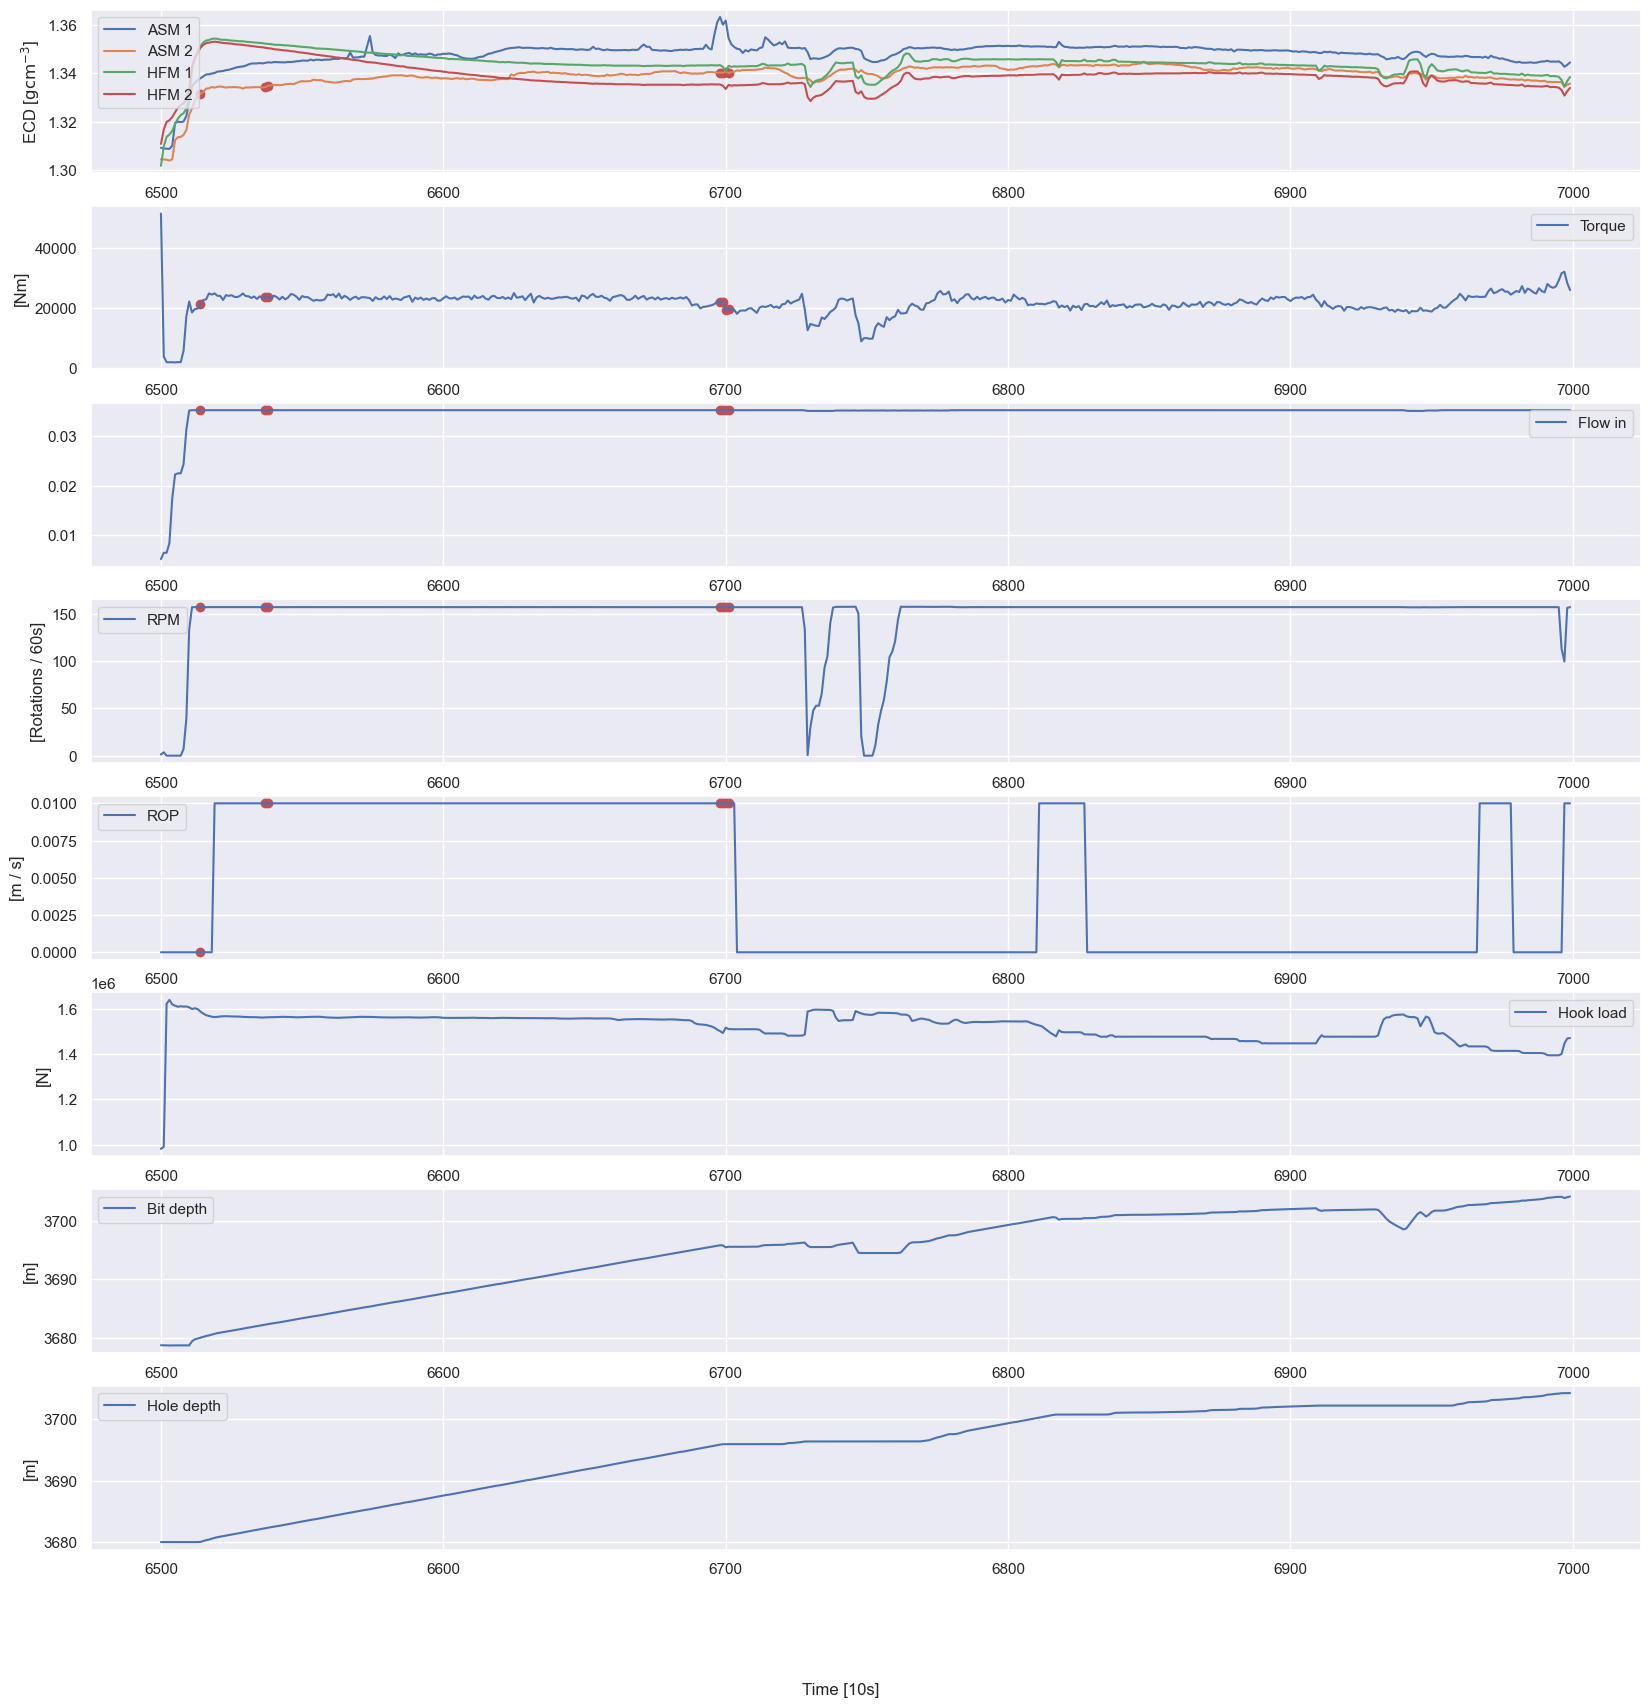

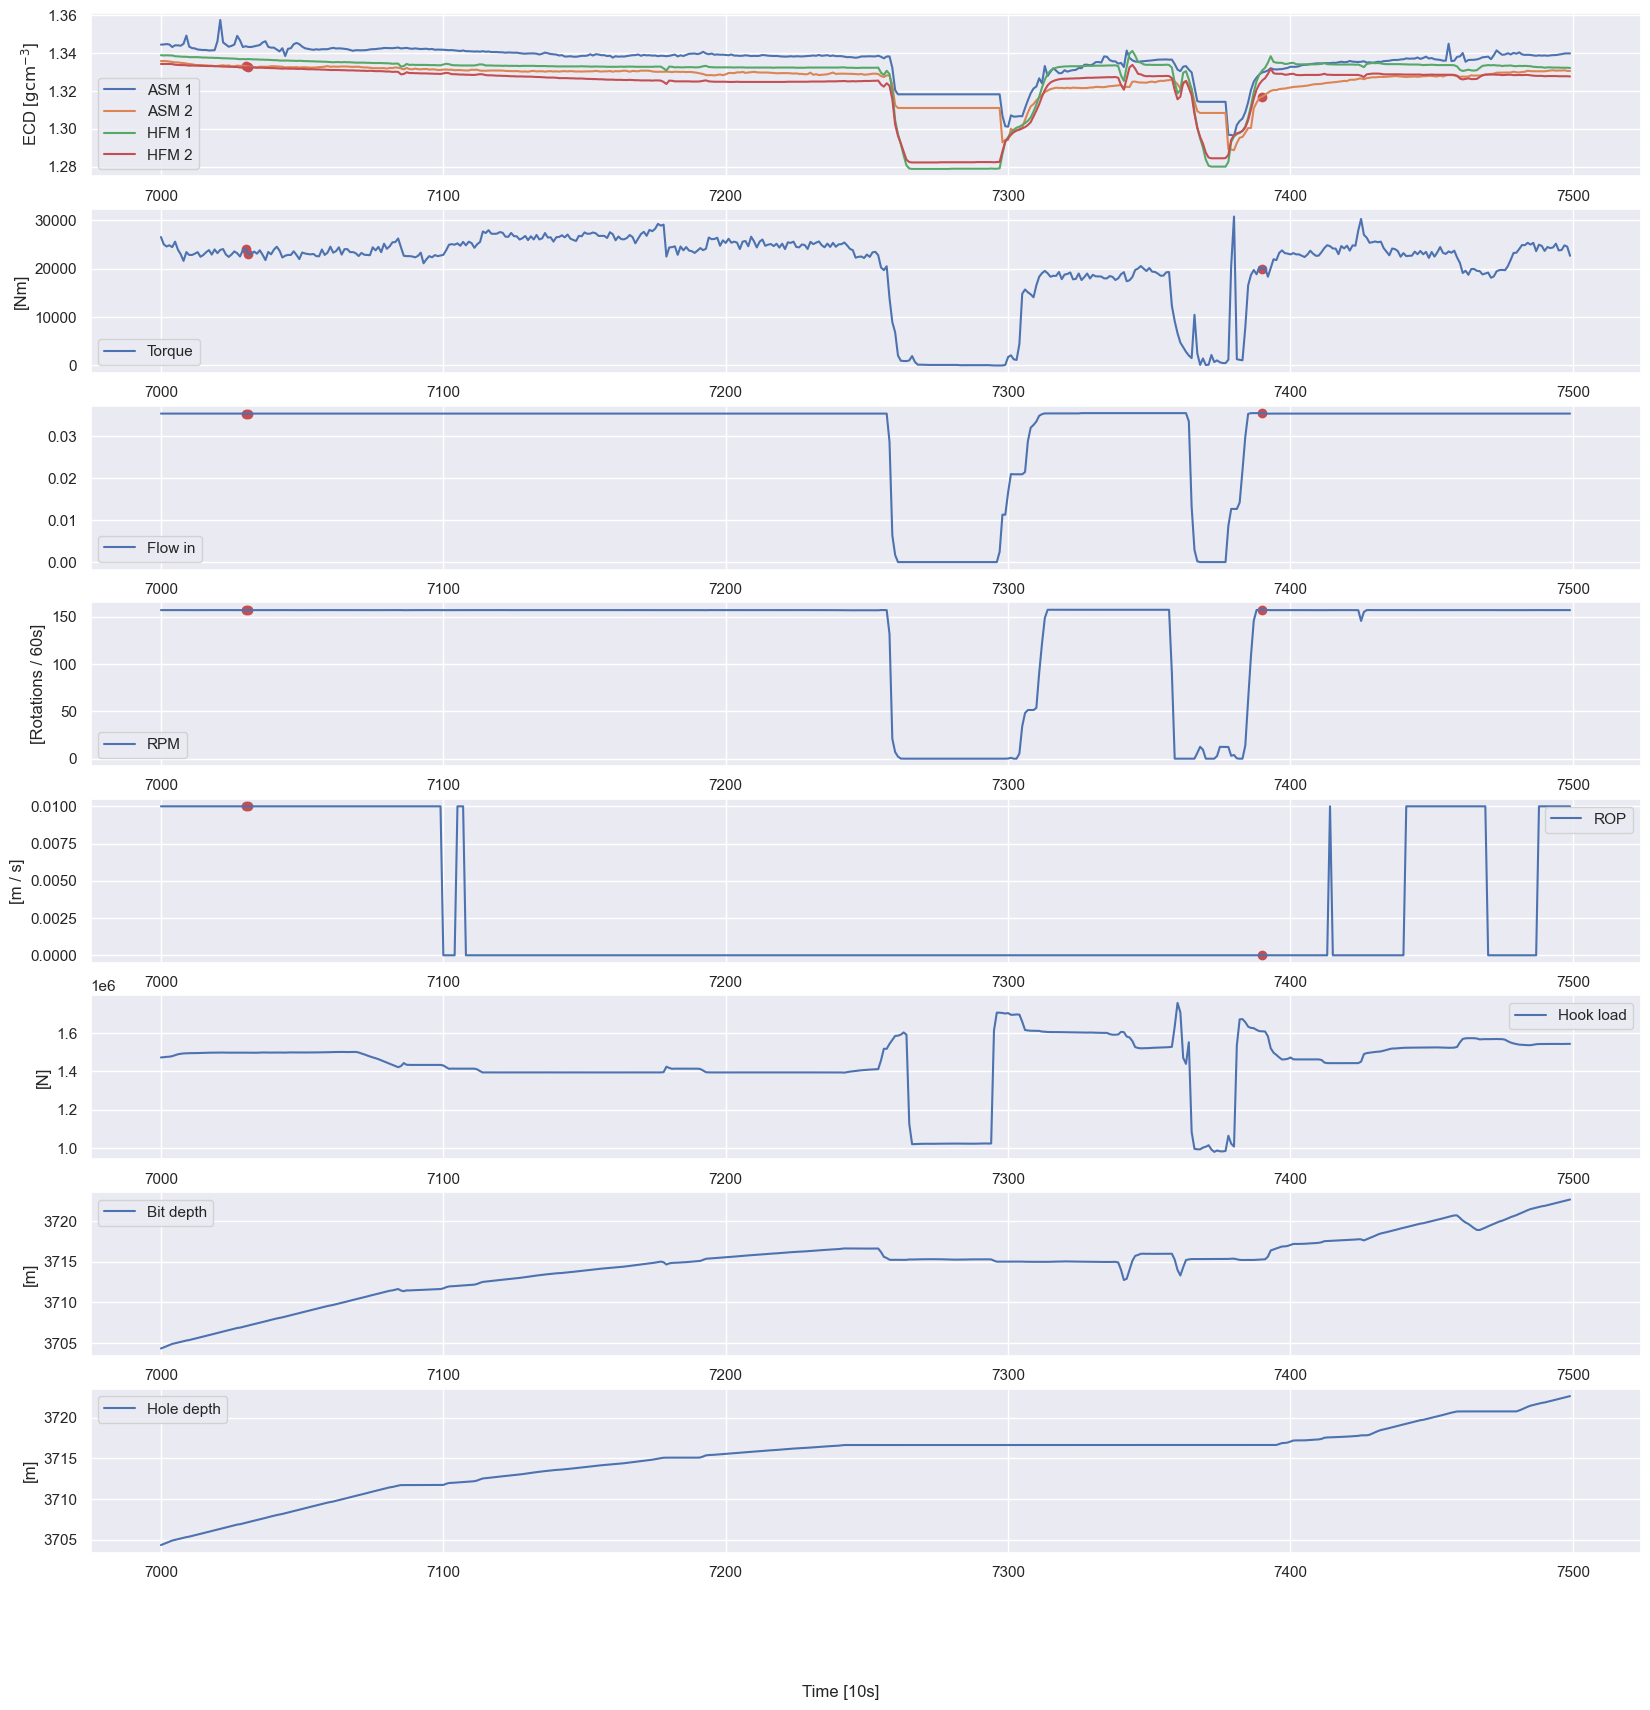

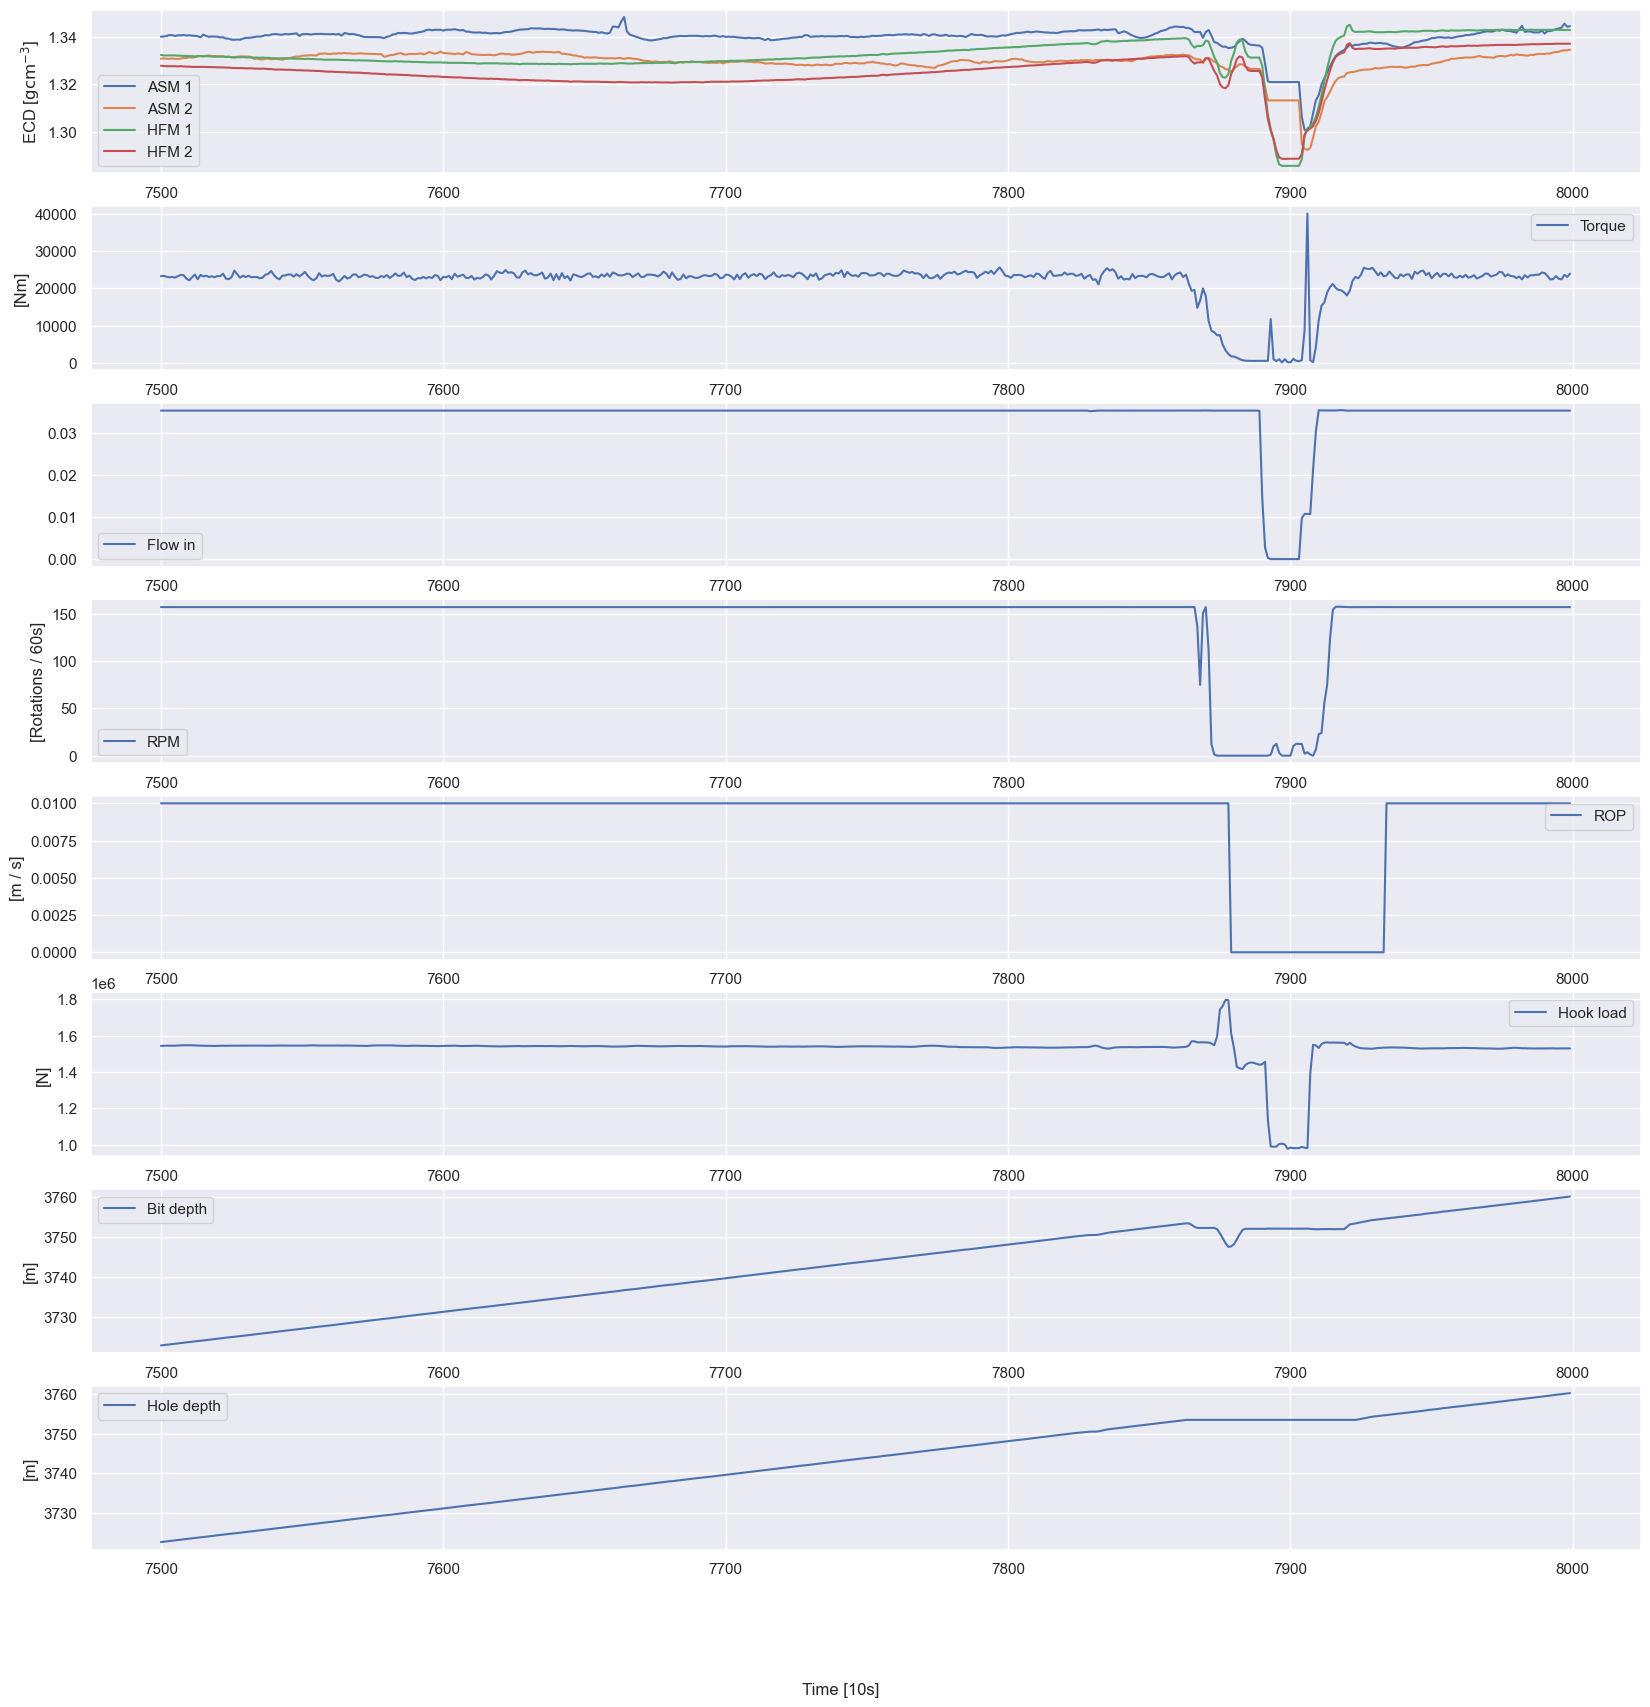

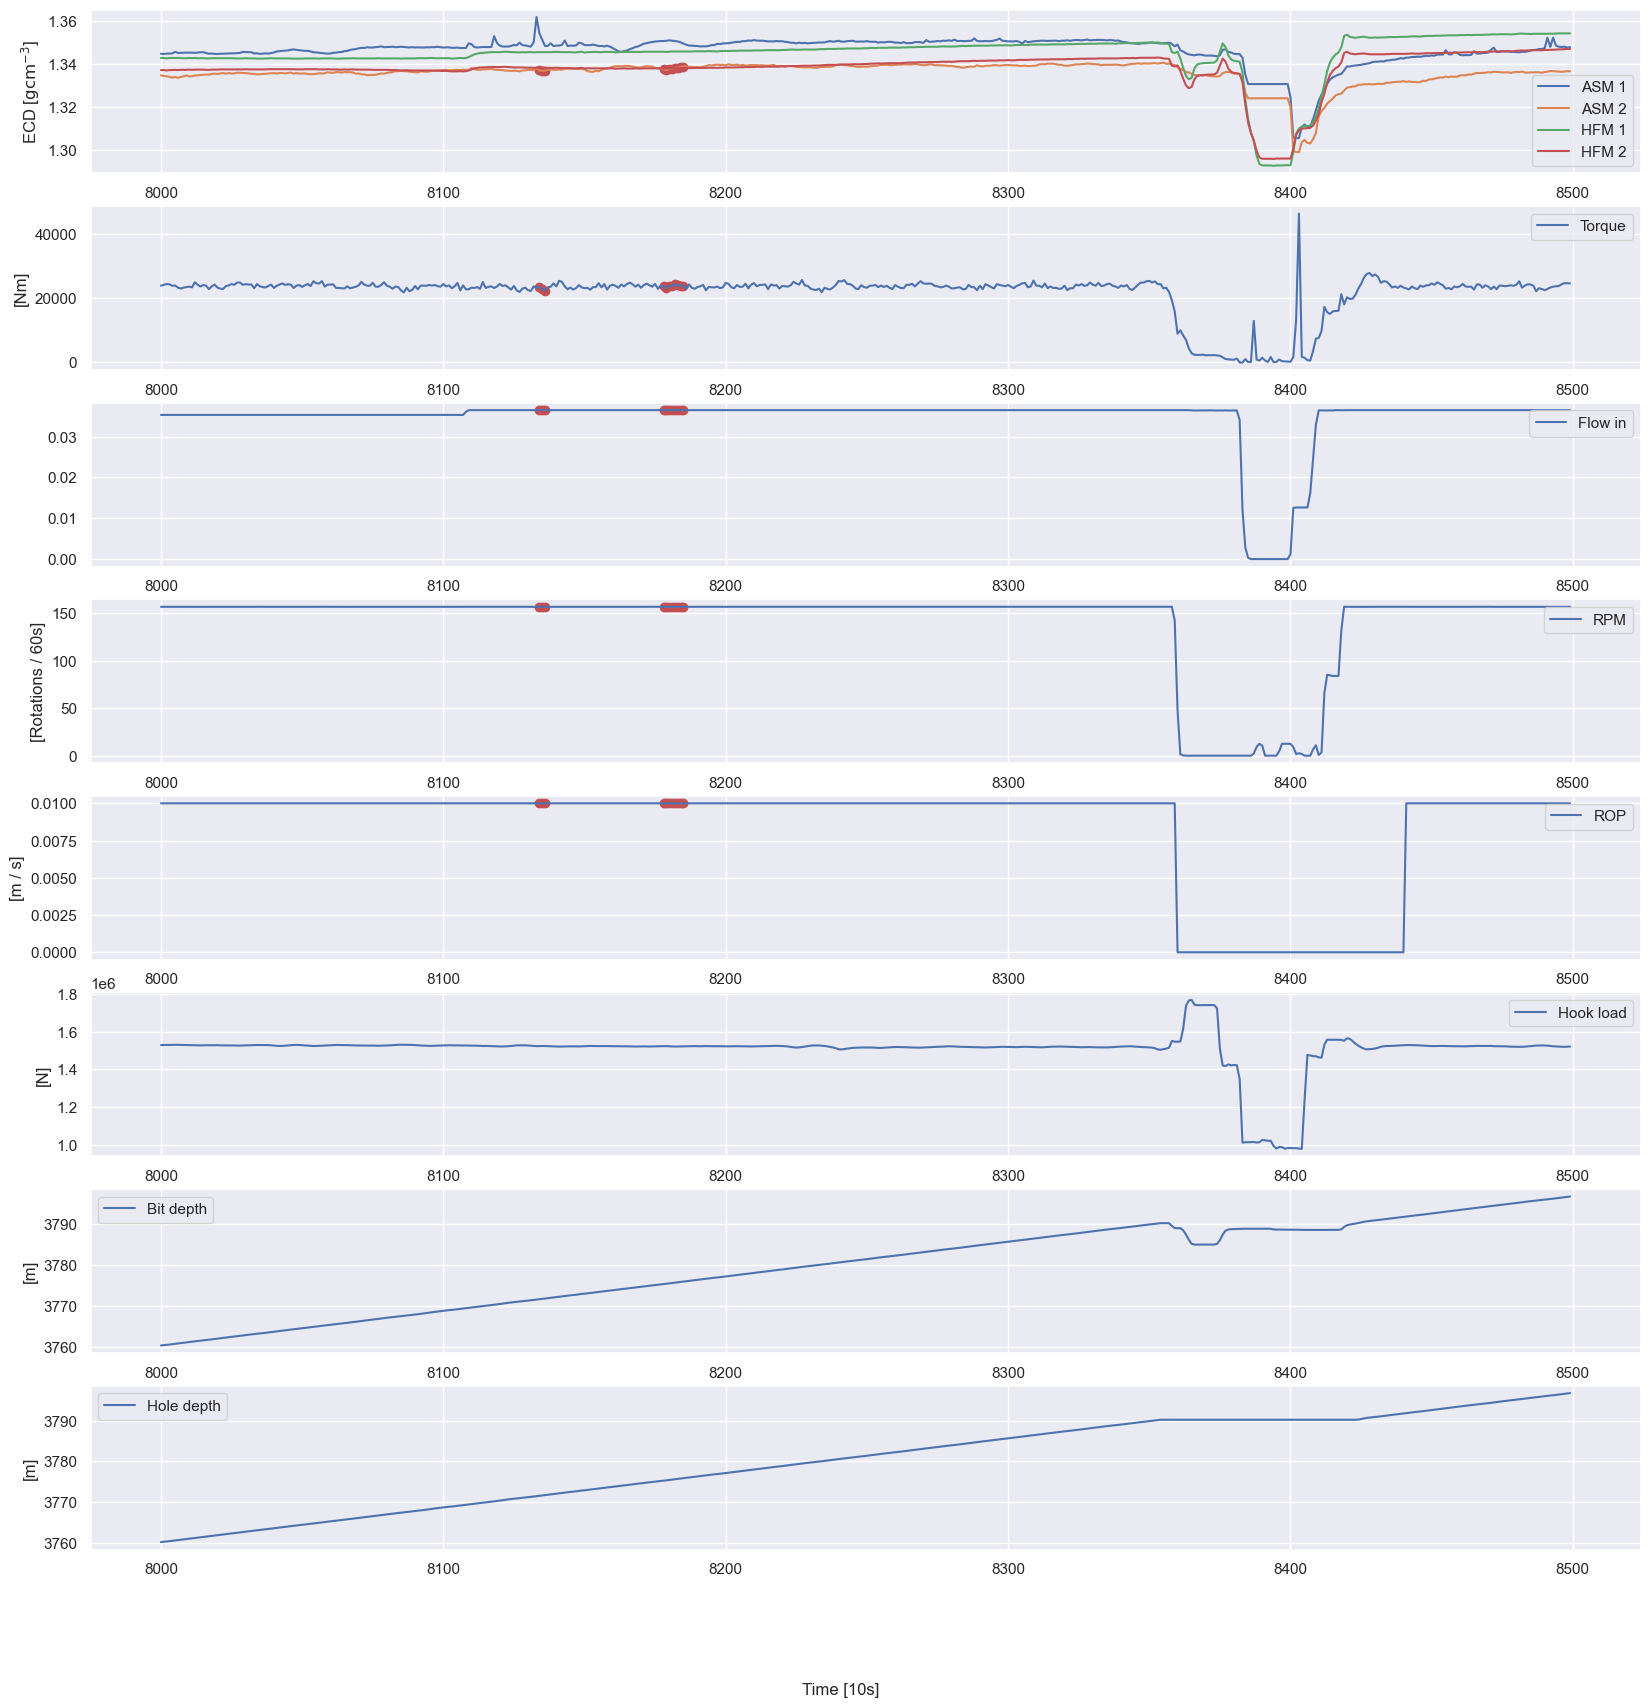

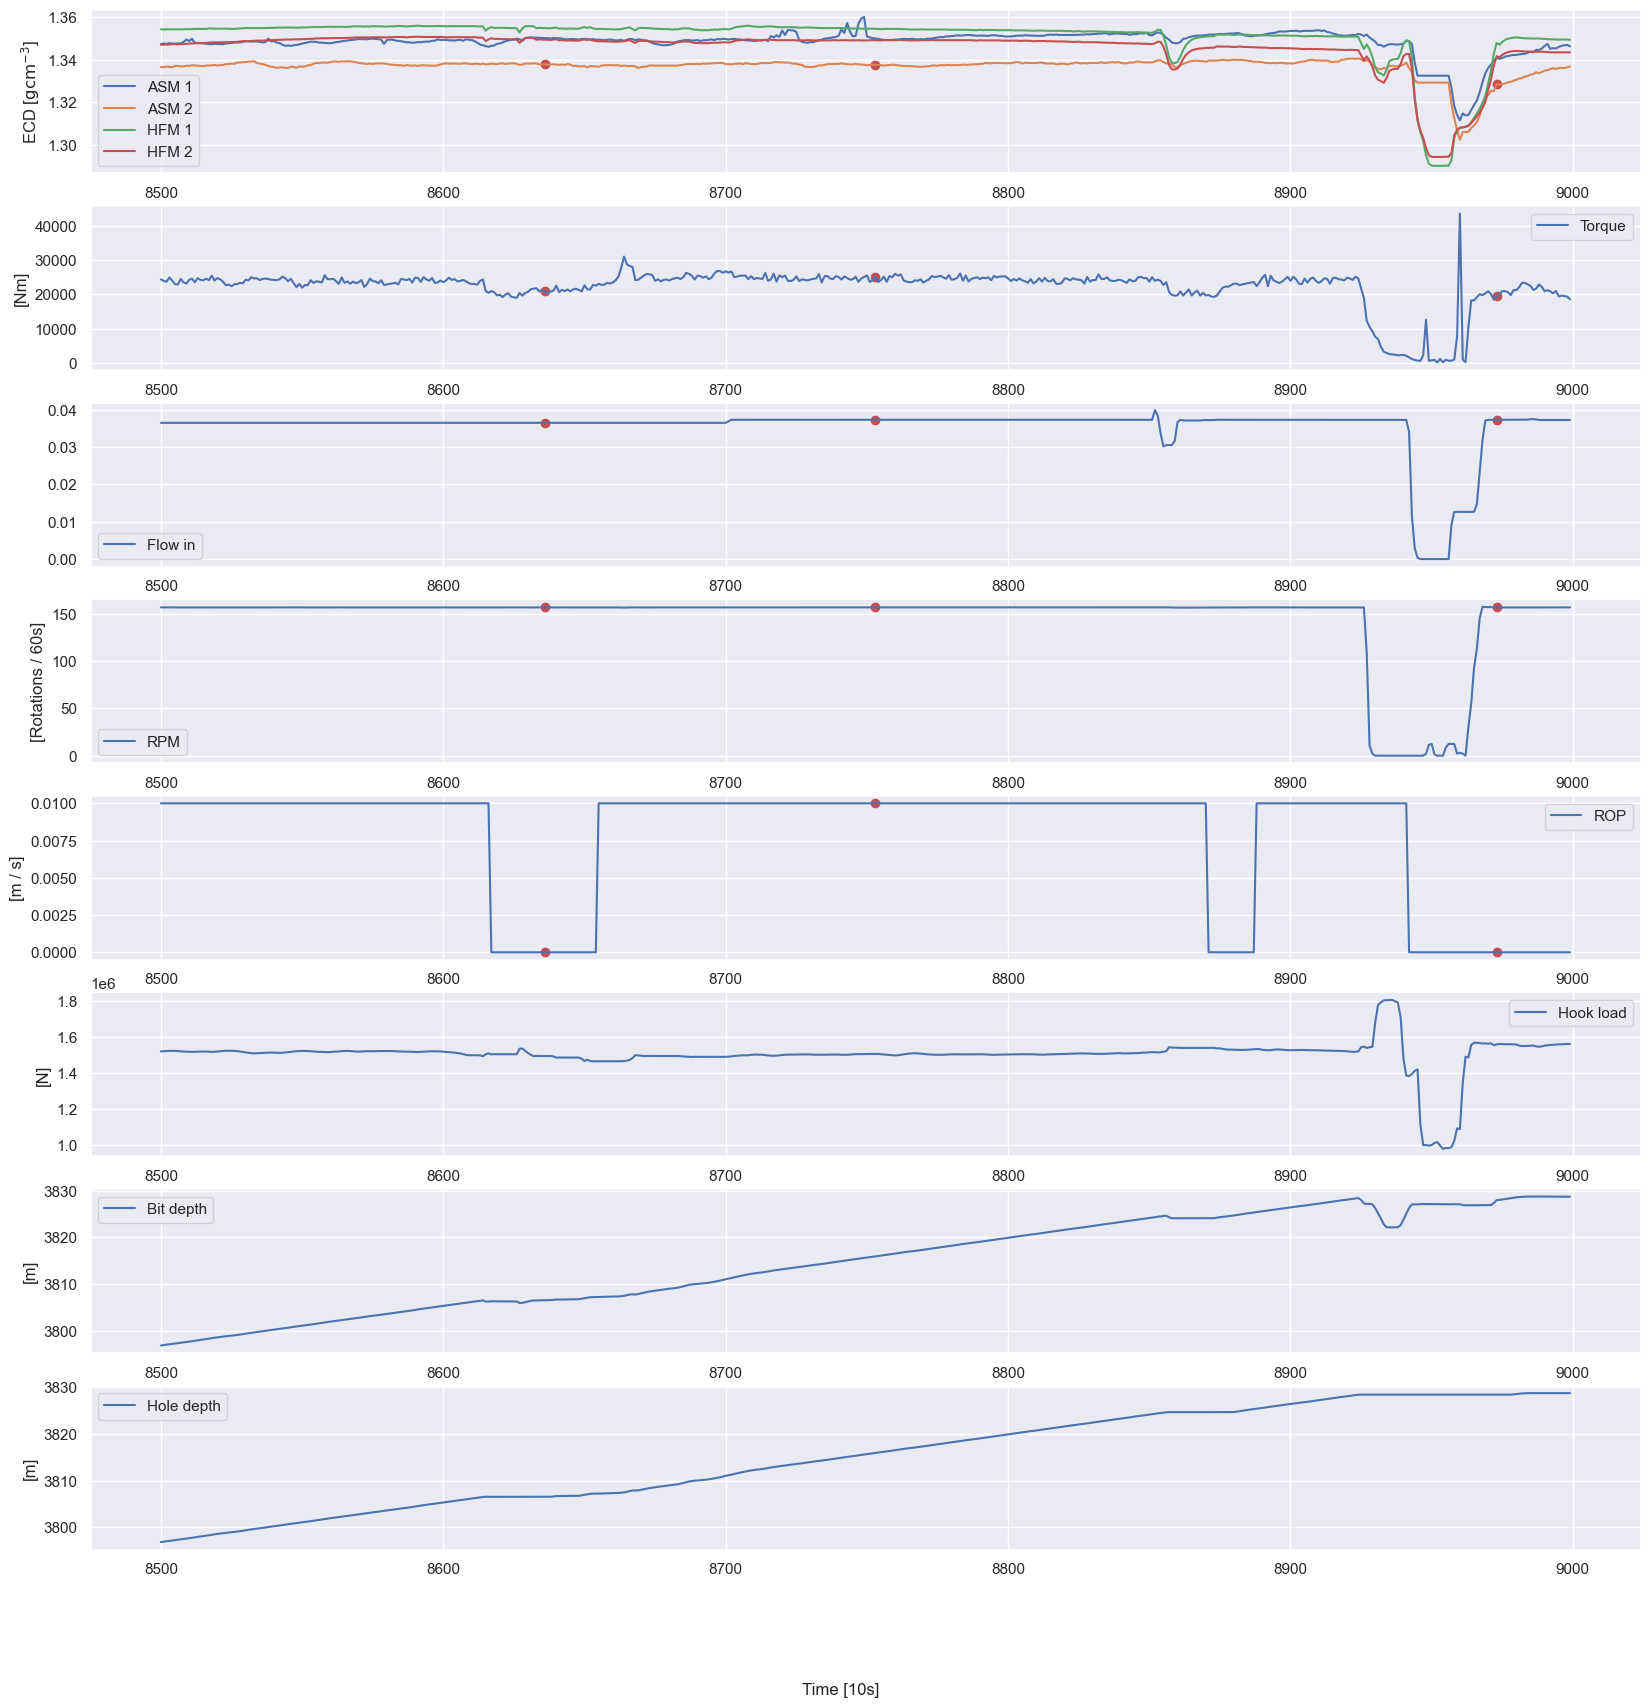

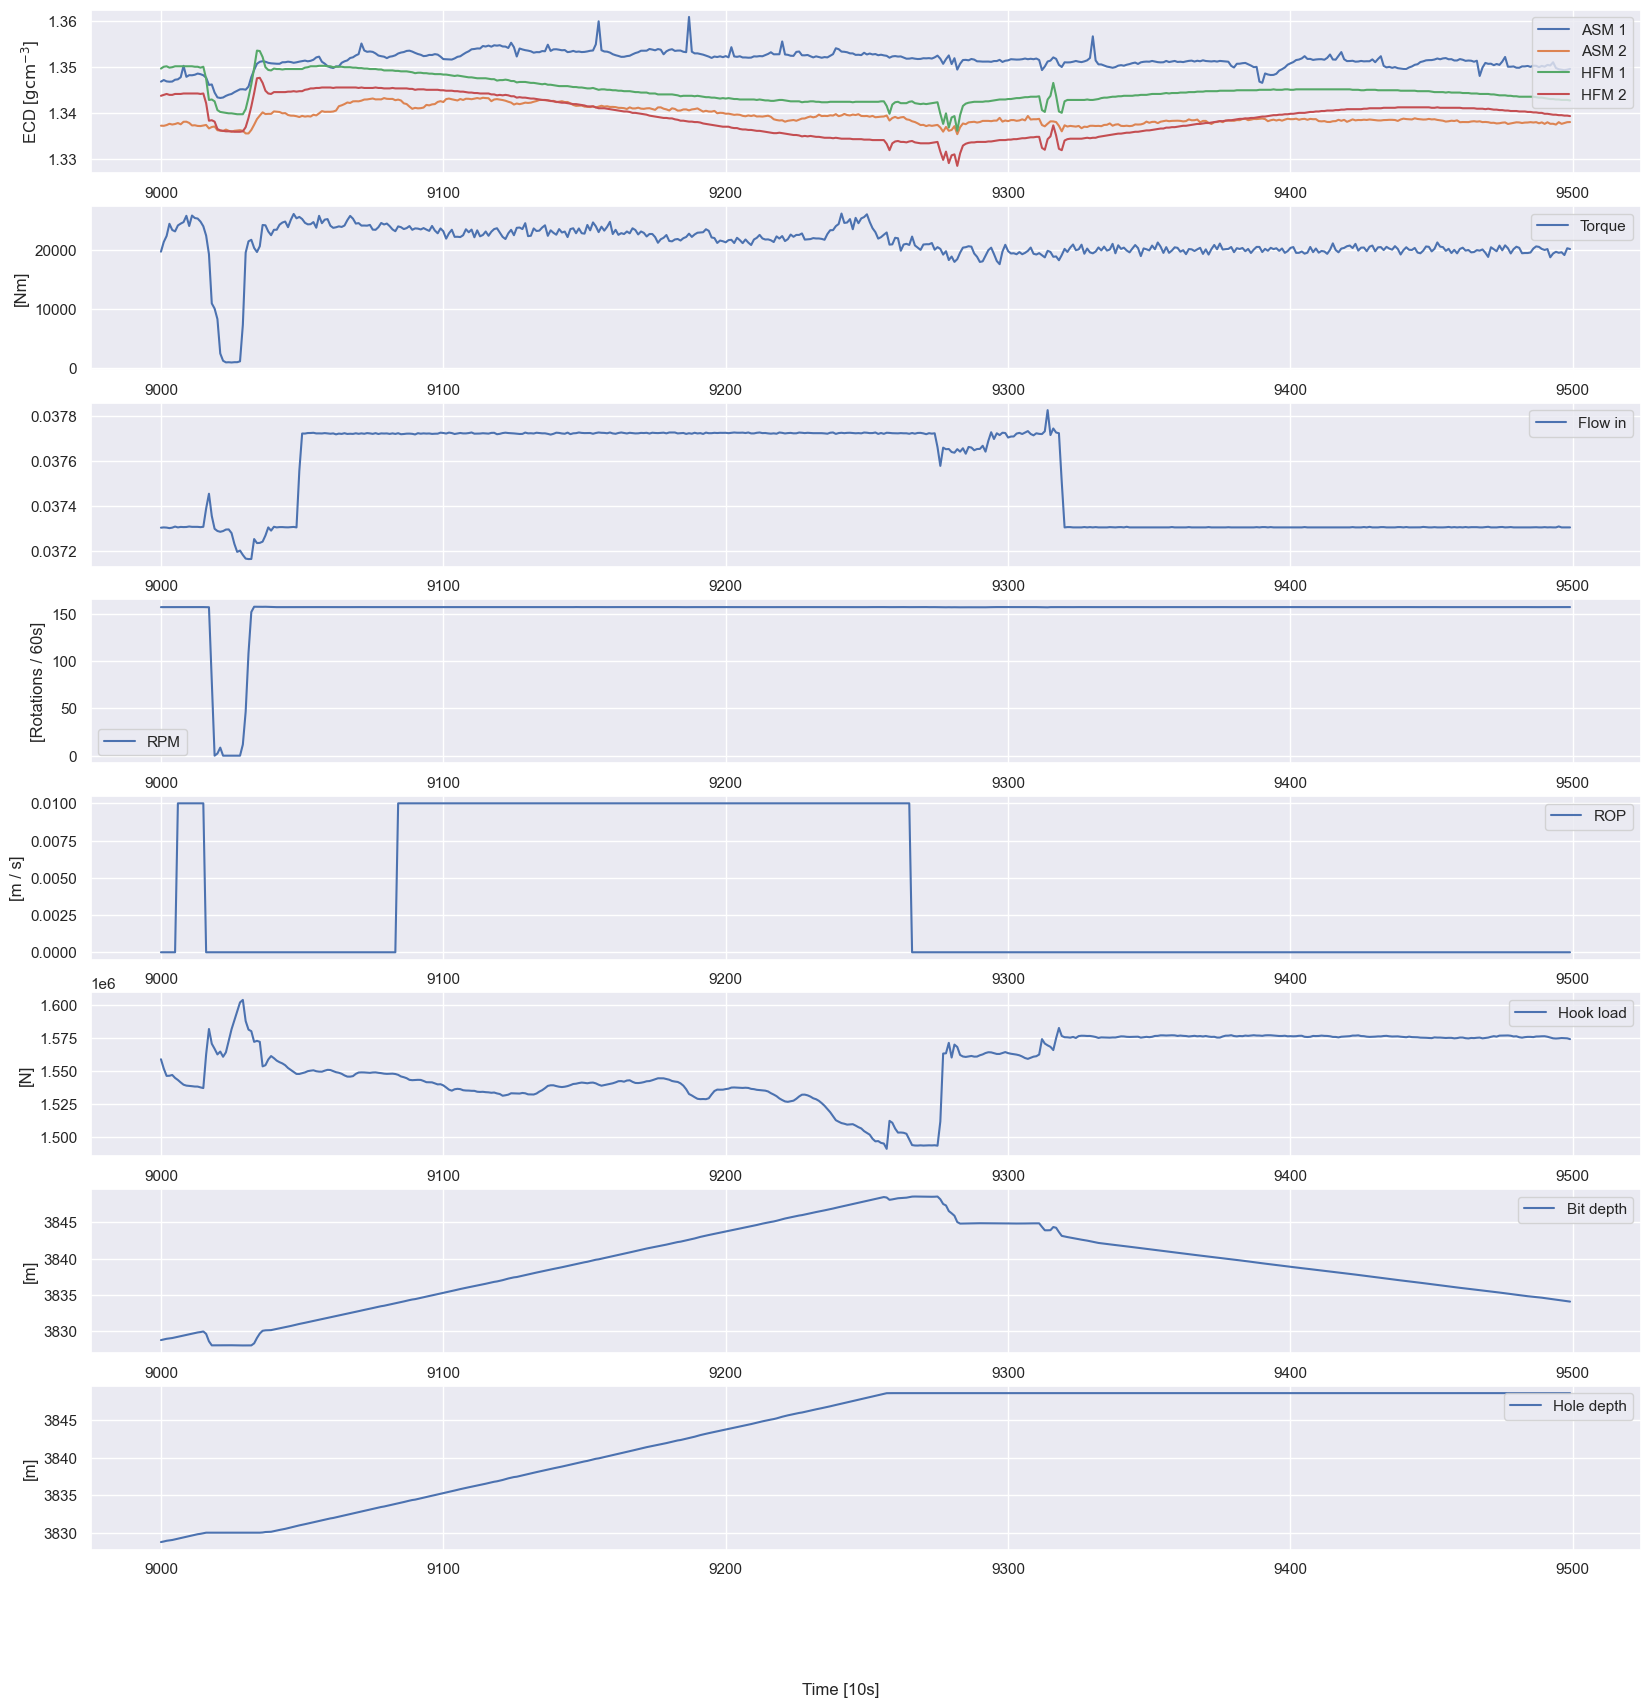

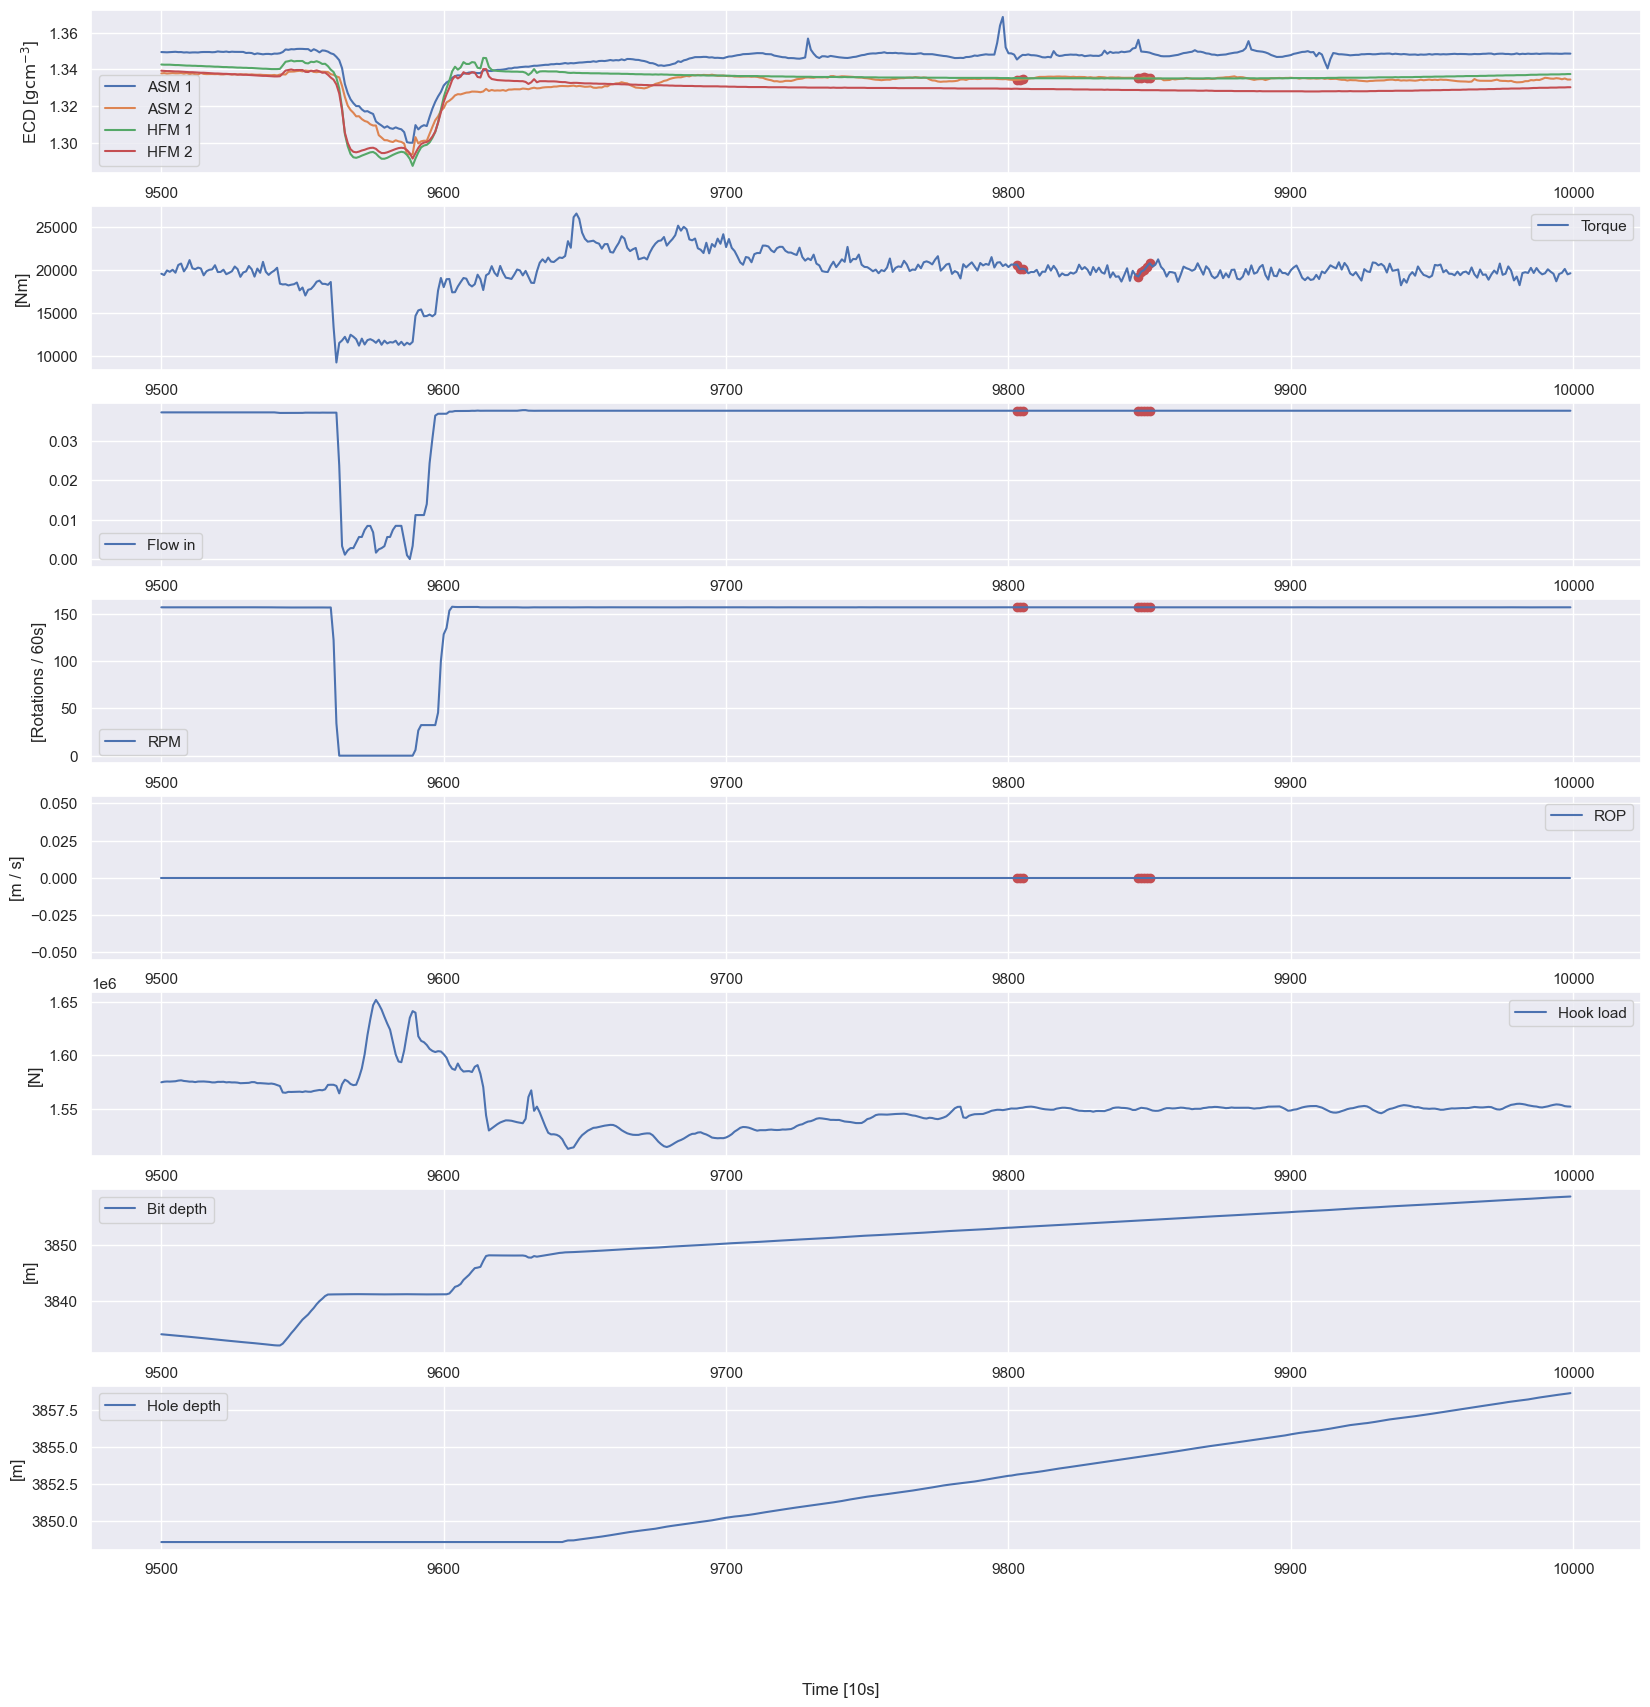

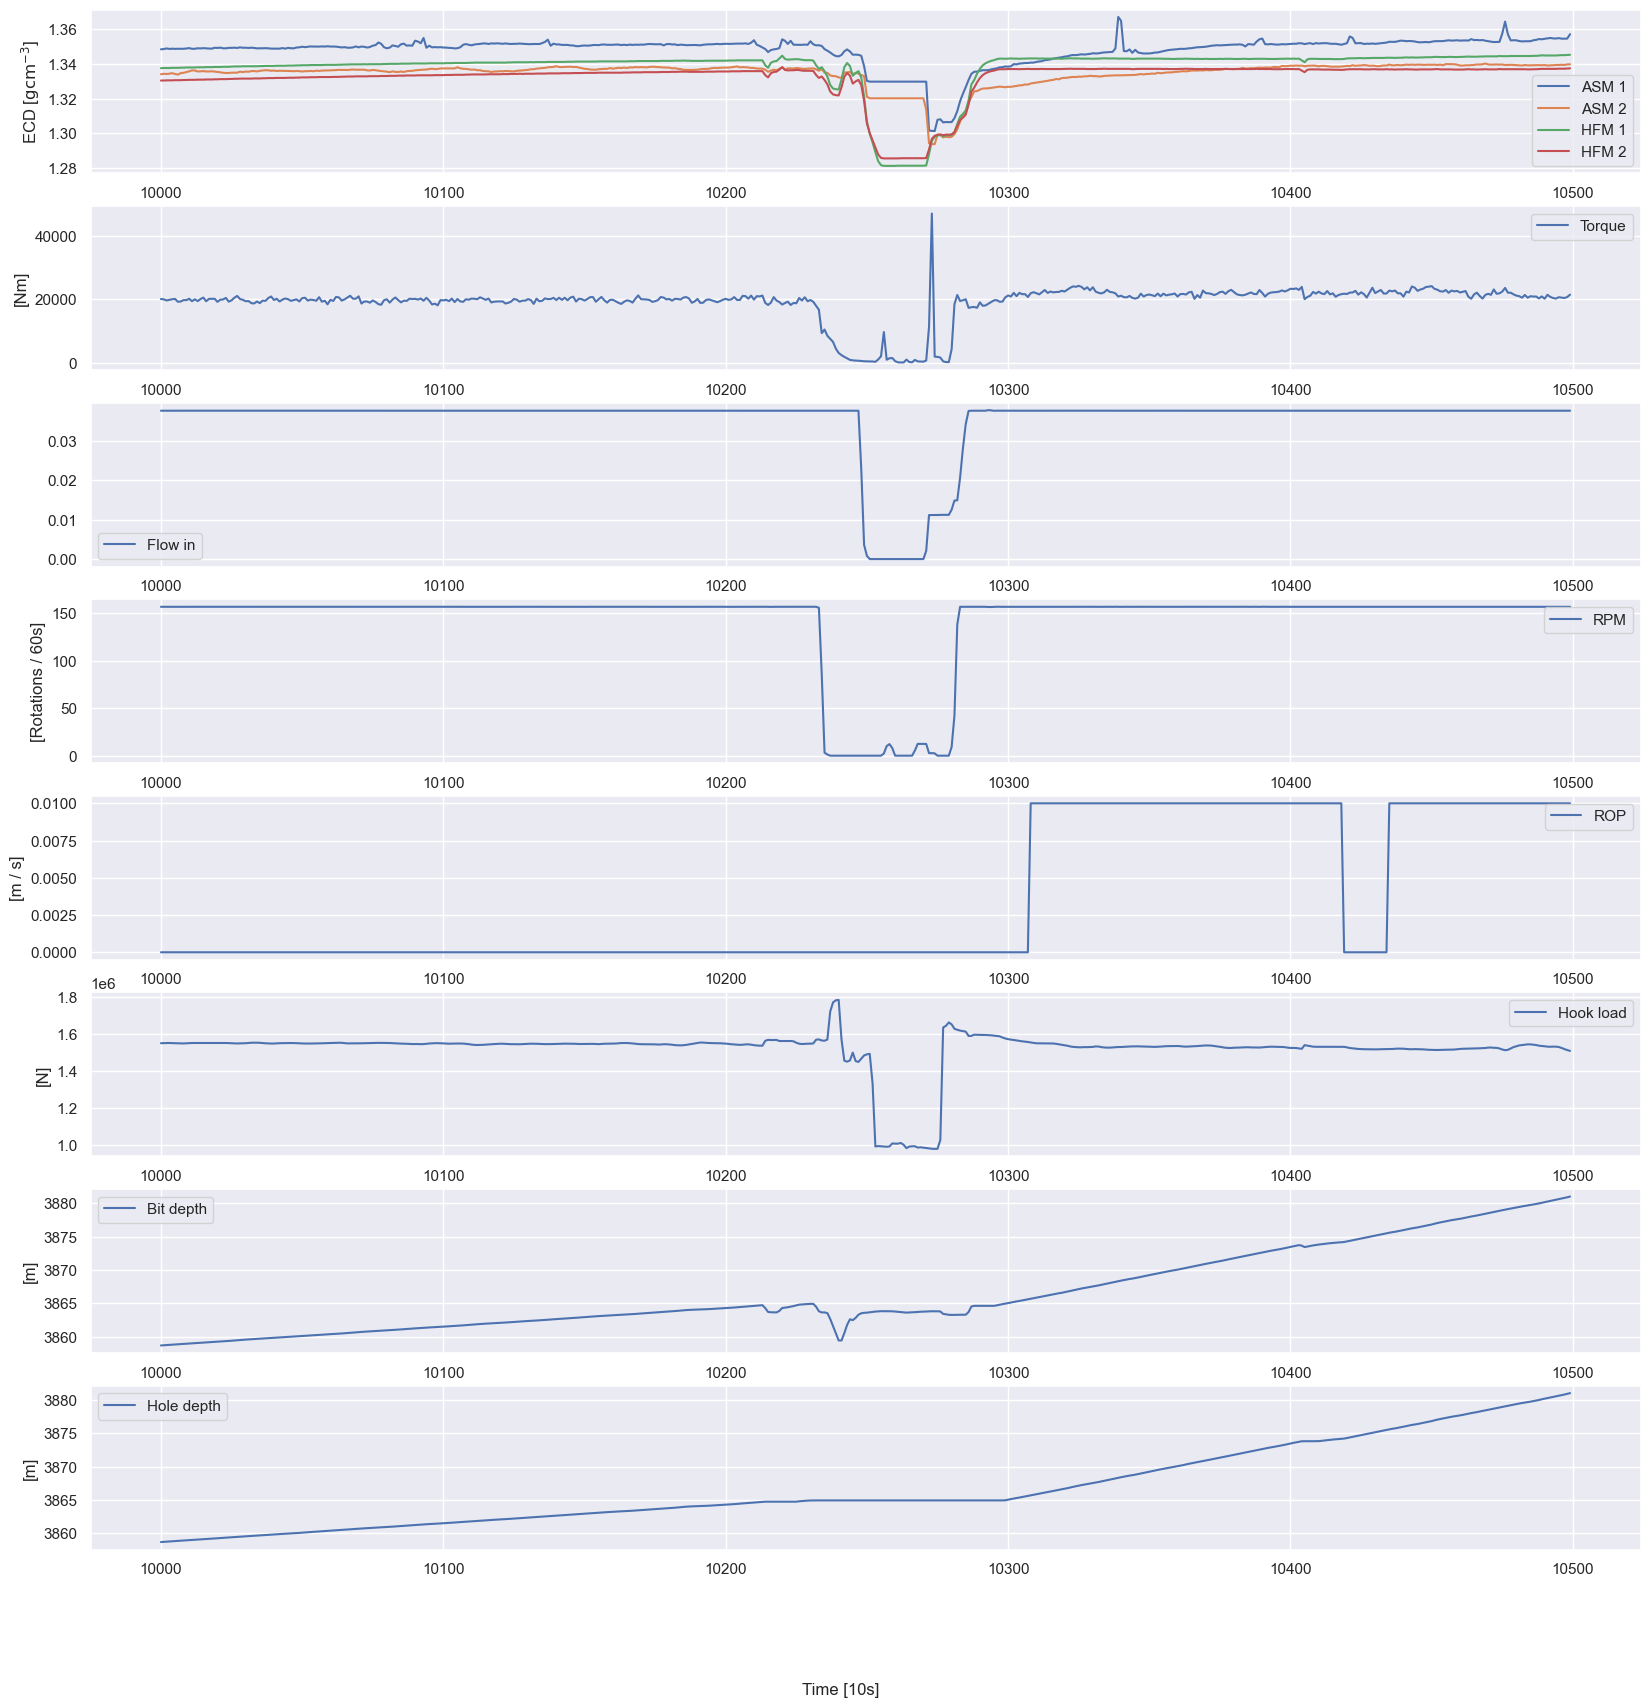

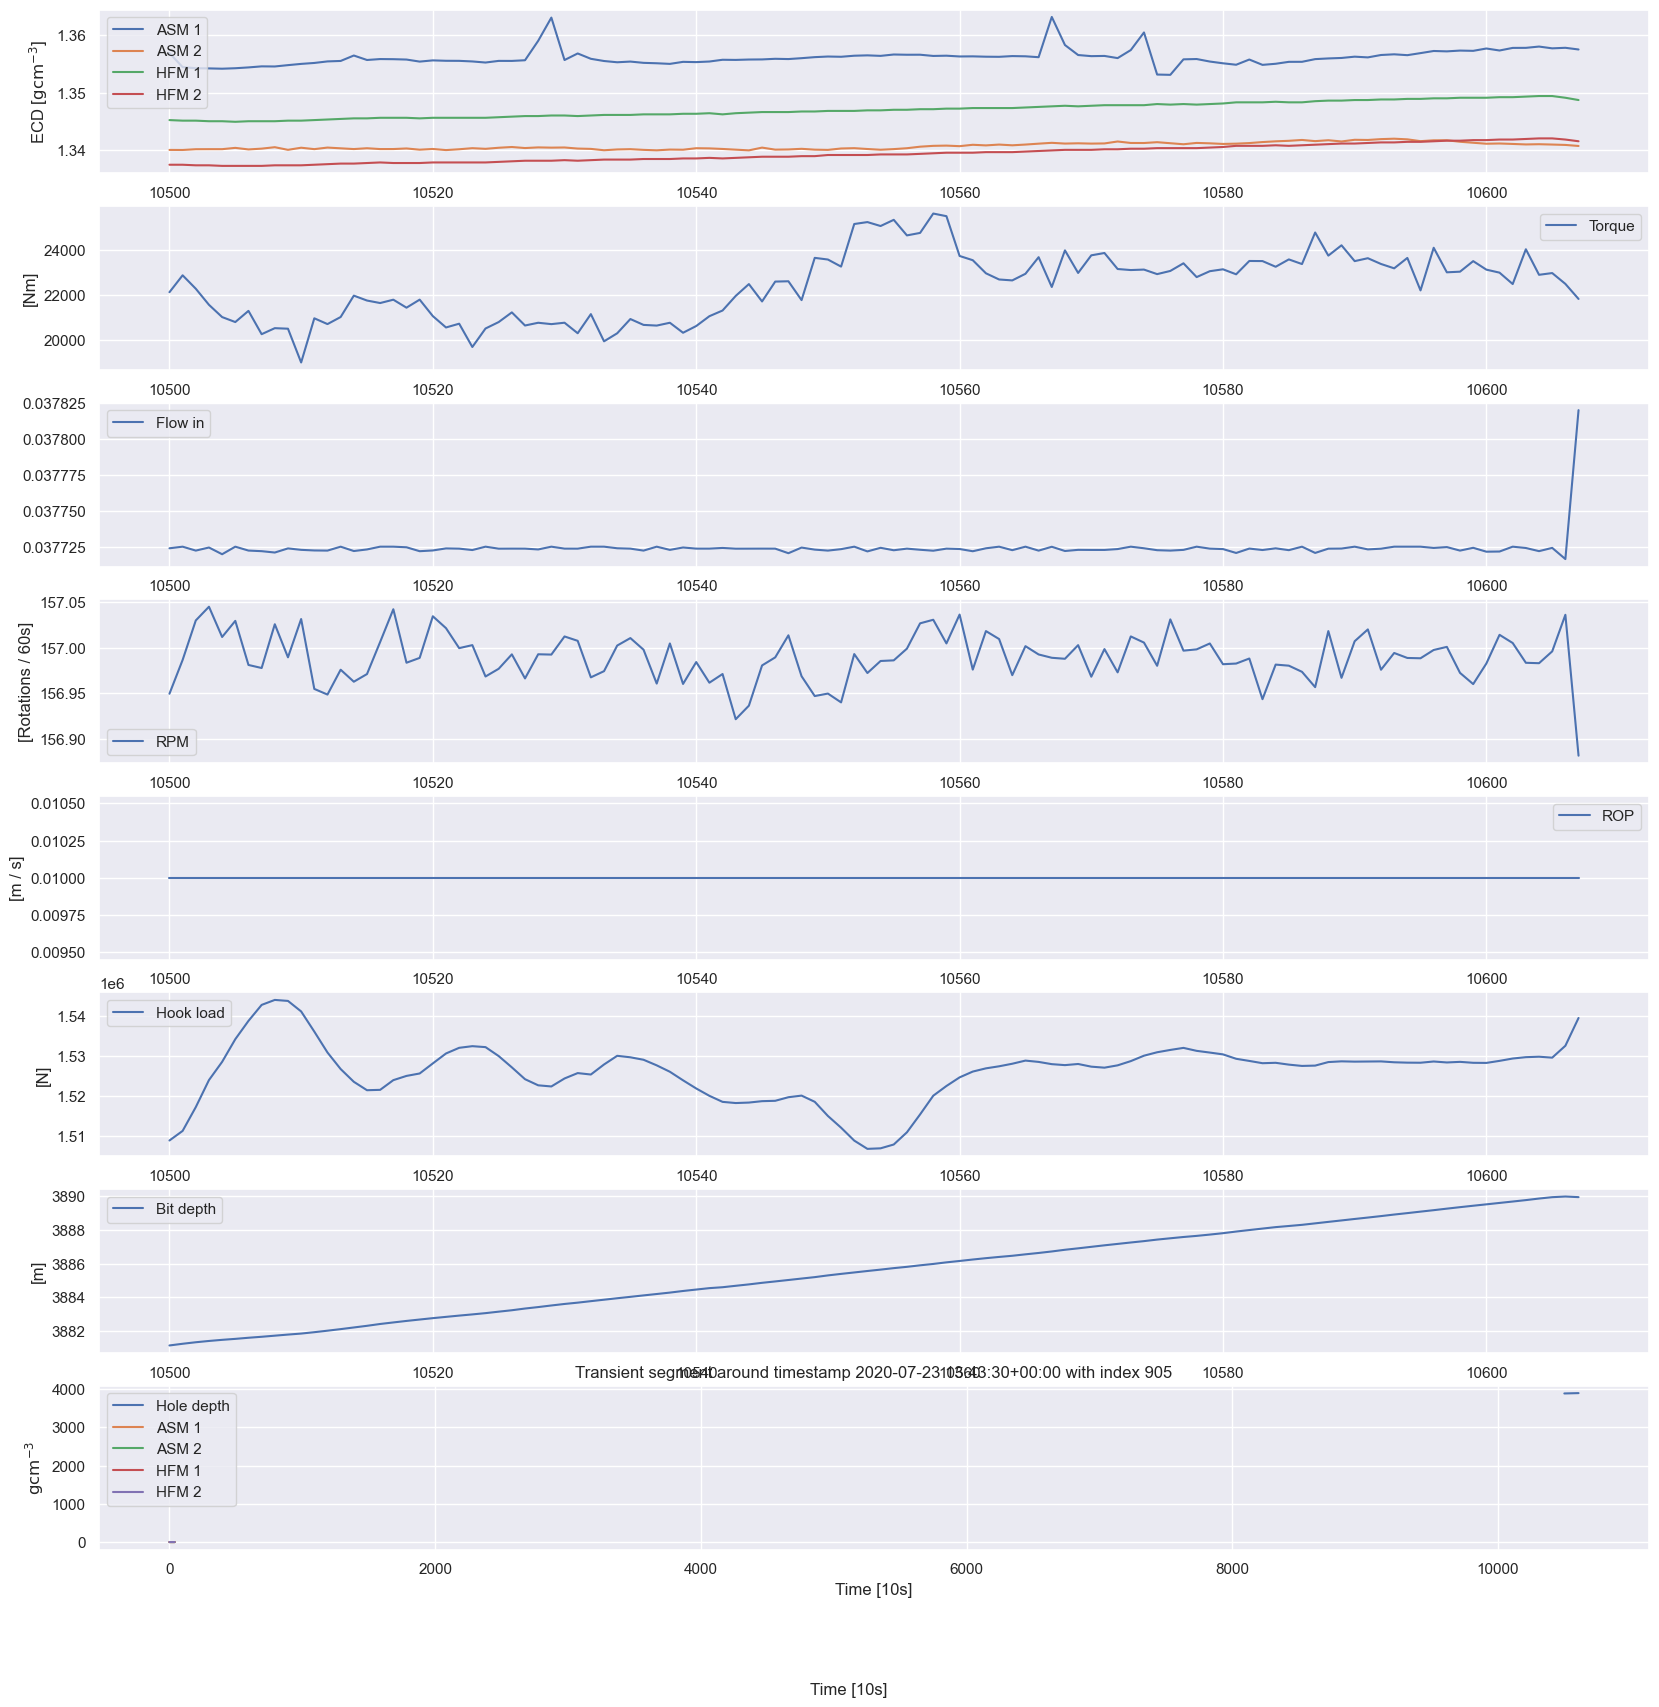

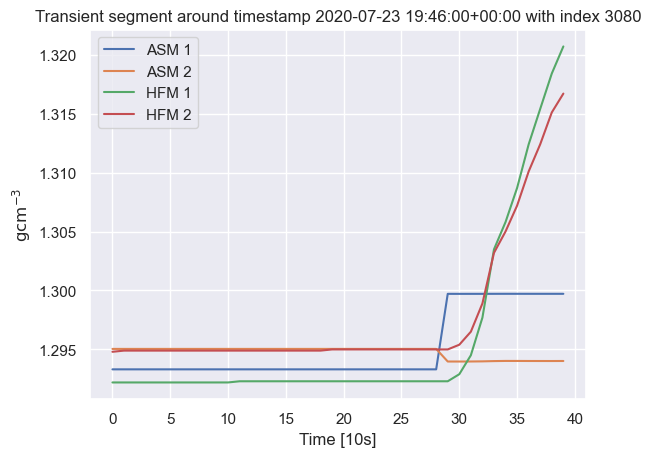

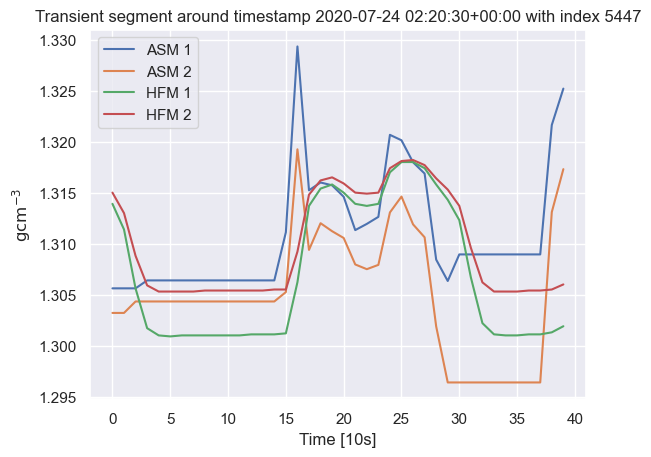

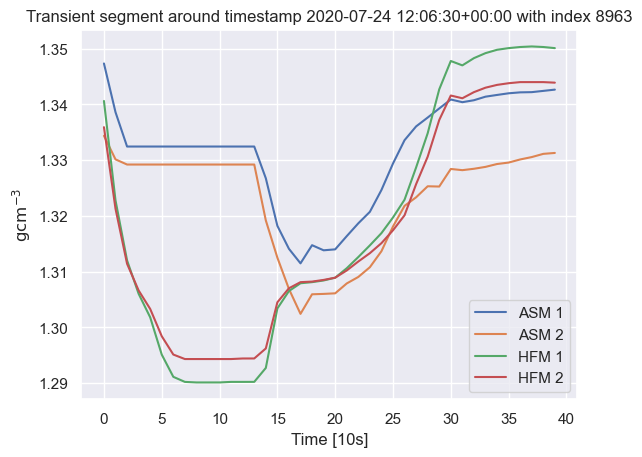

In [48]:

for segment_ecd_1, segment_ecd_2, segment_ecd_1_sim, segment_ecd_2_sim, transient in zip(ecd_1_segments, ecd_2_segments, ecd_1_segments_sim, ecd_2_segments_sim, transients):
    plt.title(f"Transient segment around timestamp {transient[0]} with index {transient[1]}")
    plt.plot(segment_ecd_1, label = "ASM 1")
    plt.plot(segment_ecd_2, label = "ASM 2")
    plt.plot(segment_ecd_1_sim, label = "HFM 1")
    plt.plot(segment_ecd_2_sim, label = "HFM 2")
    plt.ylabel(r'$\text{gcm}^{-3}$')
    plt.xlabel("Time [10s]")
    plt.legend()
    plt.show()